# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*, (under revision).

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

*Note*: Refine a network based after the network was trained on just a few labeled images is illustrated in "Demo-labeledexample-MouseReaching.ipynb". This demo also contains an already labeled data set and is perhaps the best starting point for brand new users.

## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut

In [7]:
task='front4k60fpszoom3.0_Trim' # Enter the name of your experiment Task
experimenter='nv' # Enter the name of the experimenter
video=[r"C:\Users\vjj14\Downloads\front4k60fpszoom3.0_Trim.mp4"] # Enter the paths of your videos you want to grab frames from.

path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory= r'C:\Users\vjj14\Desktop\DeepLabCut',copy_videos=True) #change the working directory to where you want the folders created.

# The function returns the path, where your project is. 
# You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
#path_config_file = '/home/Mackenzie/Reaching/config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)

Created "C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos"
Created "C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\labeled-data"
Created "C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\training-datasets"
Created "C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\dlc-models"
Copying the videos
C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom3.0_Trim.mp4
Generated "C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\config.yaml"

A new project with name front4k60fpszoom3.0_Trim-nv-2019-06-03 is created at C:\Users\vjj14\Desktop\DeepLabCut and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos'

In [2]:
path_config_file = r"C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\config.yaml"

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [8]:
%matplotlib inline

deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom3.0_Trim.mp4 ?
yes/noyes
Imageio: 'ffmpeg-win32-v3.2.4.exe' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-win32-v3.2.4.exe (34.1 MB)
Downloading: 8192/35749888 bytes (0.0442368/35749888 bytes (1.2745472/35749888 bytes (2.1974848/35749888 bytes (2.71384448/35749888 bytes (3.9%1810432/35749888 bytes (5.1%2220032/35749888 bytes (6.2%2646016/35749888 bytes (7.4%2949120/35749888 bytes (8.2%3252224/35749888 bytes (9.1%3538944/35749888 bytes (9.9%3760128/35749888 bytes (10.53997696/35749888 bytes (11.24284416/35749888 bytes (12.04612096/35749888 bytes (12.94882432/35749888 bytes (13.75177344/35749888 bytes (14.55480448/35749888 bytes (15.35775360/35749888 bytes (16.26070272/35749888 bytes (17.06275072/35749888 by

## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [ ]:
%gui wx
deeplabcut.label_frames(path_config_file)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [3]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by nv.
They are stored in the following folder: C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\labeled-data\front4k60fpszoom3.0_Trim_labeled.


KeyboardInterrupt: 

If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [4]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


In [5]:
import tensorflow as tf
tf.__version__

'1.12.0'

## Start training - If you want to use a CPU, continue. 
### If yu want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [6]:
deeplabcut.train_network(path_config_file, shuffle=1, saveiters=500, displayiters=50)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['LeftHand', 'RightHand', 'Nose', 'Pellet'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_front4k60fpszoom3.0_TrimJun3\\front4k60fpszoom3.0_Trim_nv95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_front4k60fpszoom3.0_TrimJun3\\Document

INFO:tensorflow:Restoring parameters from C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt
Display_iters overwritten as 50
Save_iters overwritten as 500
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\vjj14\\Desktop\\DeepLabCut\\front4k60fpszoom3.0_Trim-nv-2019-06-03\\dlc-models\\iteration-0\\front4k60fpszoom3.0_TrimJun3-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'de

iteration: 50 loss: 0.0824 lr: 0.005
iteration: 100 loss: 0.0162 lr: 0.005
iteration: 150 loss: 0.0152 lr: 0.005
iteration: 200 loss: 0.0138 lr: 0.005
iteration: 250 loss: 0.0137 lr: 0.005
iteration: 300 loss: 0.0136 lr: 0.005
iteration: 350 loss: 0.0124 lr: 0.005
iteration: 400 loss: 0.0115 lr: 0.005
iteration: 450 loss: 0.0129 lr: 0.005
iteration: 500 loss: 0.0121 lr: 0.005
iteration: 550 loss: 0.0130 lr: 0.005
iteration: 600 loss: 0.0113 lr: 0.005
iteration: 650 loss: 0.0114 lr: 0.005
iteration: 700 loss: 0.0109 lr: 0.005
iteration: 750 loss: 0.0115 lr: 0.005
iteration: 800 loss: 0.0124 lr: 0.005
iteration: 850 loss: 0.0115 lr: 0.005
iteration: 900 loss: 0.0110 lr: 0.005
iteration: 950 loss: 0.0113 lr: 0.005
iteration: 1000 loss: 0.0110 lr: 0.005
iteration: 1050 loss: 0.0122 lr: 0.005
iteration: 1100 loss: 0.0097 lr: 0.005
iteration: 1150 loss: 0.0115 lr: 0.005
iteration: 1200 loss: 0.0124 lr: 0.005
iteration: 1250 loss: 0.0110 lr: 0.005
iteration: 1300 loss: 0.0108 lr: 0.005
iterat

iteration: 10550 loss: 0.0112 lr: 0.02
iteration: 10600 loss: 0.0105 lr: 0.02
iteration: 10650 loss: 0.0105 lr: 0.02
iteration: 10700 loss: 0.0113 lr: 0.02
iteration: 10750 loss: 0.0103 lr: 0.02
iteration: 10800 loss: 0.0111 lr: 0.02
iteration: 10850 loss: 0.0114 lr: 0.02
iteration: 10900 loss: 0.0101 lr: 0.02
iteration: 10950 loss: 0.0102 lr: 0.02
iteration: 11000 loss: 0.0098 lr: 0.02
iteration: 11050 loss: 0.0111 lr: 0.02
iteration: 11100 loss: 0.0108 lr: 0.02
iteration: 11150 loss: 0.0108 lr: 0.02
iteration: 11200 loss: 0.0113 lr: 0.02
iteration: 11250 loss: 0.0092 lr: 0.02
iteration: 11300 loss: 0.0109 lr: 0.02
iteration: 11350 loss: 0.0096 lr: 0.02
iteration: 11400 loss: 0.0102 lr: 0.02
iteration: 11450 loss: 0.0101 lr: 0.02
iteration: 11500 loss: 0.0099 lr: 0.02
iteration: 11550 loss: 0.0096 lr: 0.02
iteration: 11600 loss: 0.0101 lr: 0.02
iteration: 11650 loss: 0.0099 lr: 0.02
iteration: 11700 loss: 0.0095 lr: 0.02
iteration: 11750 loss: 0.0110 lr: 0.02
iteration: 11800 loss: 0.

iteration: 21050 loss: 0.0074 lr: 0.02
iteration: 21100 loss: 0.0074 lr: 0.02
iteration: 21150 loss: 0.0073 lr: 0.02
iteration: 21200 loss: 0.0078 lr: 0.02
iteration: 21250 loss: 0.0077 lr: 0.02
iteration: 21300 loss: 0.0080 lr: 0.02
iteration: 21350 loss: 0.0070 lr: 0.02
iteration: 21400 loss: 0.0072 lr: 0.02
iteration: 21450 loss: 0.0077 lr: 0.02
iteration: 21500 loss: 0.0076 lr: 0.02
iteration: 21550 loss: 0.0080 lr: 0.02
iteration: 21600 loss: 0.0069 lr: 0.02
iteration: 21650 loss: 0.0071 lr: 0.02
iteration: 21700 loss: 0.0082 lr: 0.02
iteration: 21750 loss: 0.0083 lr: 0.02
iteration: 21800 loss: 0.0080 lr: 0.02
iteration: 21850 loss: 0.0081 lr: 0.02
iteration: 21900 loss: 0.0072 lr: 0.02
iteration: 21950 loss: 0.0070 lr: 0.02
iteration: 22000 loss: 0.0081 lr: 0.02
iteration: 22050 loss: 0.0073 lr: 0.02
iteration: 22100 loss: 0.0080 lr: 0.02
iteration: 22150 loss: 0.0069 lr: 0.02
iteration: 22200 loss: 0.0075 lr: 0.02
iteration: 22250 loss: 0.0070 lr: 0.02
iteration: 22300 loss: 0.

iteration: 31550 loss: 0.0054 lr: 0.02
iteration: 31600 loss: 0.0056 lr: 0.02
iteration: 31650 loss: 0.0052 lr: 0.02
iteration: 31700 loss: 0.0051 lr: 0.02
iteration: 31750 loss: 0.0058 lr: 0.02
iteration: 31800 loss: 0.0052 lr: 0.02
iteration: 31850 loss: 0.0054 lr: 0.02
iteration: 31900 loss: 0.0059 lr: 0.02
iteration: 31950 loss: 0.0067 lr: 0.02
iteration: 32000 loss: 0.0070 lr: 0.02
iteration: 32050 loss: 0.0056 lr: 0.02
iteration: 32100 loss: 0.0065 lr: 0.02
iteration: 32150 loss: 0.0051 lr: 0.02
iteration: 32200 loss: 0.0051 lr: 0.02
iteration: 32250 loss: 0.0054 lr: 0.02
iteration: 32300 loss: 0.0058 lr: 0.02
iteration: 32350 loss: 0.0052 lr: 0.02
iteration: 32400 loss: 0.0066 lr: 0.02
iteration: 32450 loss: 0.0050 lr: 0.02
iteration: 32500 loss: 0.0054 lr: 0.02
iteration: 32550 loss: 0.0054 lr: 0.02
iteration: 32600 loss: 0.0061 lr: 0.02
iteration: 32650 loss: 0.0056 lr: 0.02
iteration: 32700 loss: 0.0057 lr: 0.02
iteration: 32750 loss: 0.0057 lr: 0.02
iteration: 32800 loss: 0.

iteration: 42050 loss: 0.0048 lr: 0.02
iteration: 42100 loss: 0.0042 lr: 0.02
iteration: 42150 loss: 0.0046 lr: 0.02
iteration: 42200 loss: 0.0044 lr: 0.02
iteration: 42250 loss: 0.0044 lr: 0.02
iteration: 42300 loss: 0.0037 lr: 0.02
iteration: 42350 loss: 0.0045 lr: 0.02
iteration: 42400 loss: 0.0041 lr: 0.02
iteration: 42450 loss: 0.0047 lr: 0.02
iteration: 42500 loss: 0.0037 lr: 0.02
iteration: 42550 loss: 0.0036 lr: 0.02
iteration: 42600 loss: 0.0039 lr: 0.02
iteration: 42650 loss: 0.0035 lr: 0.02
iteration: 42700 loss: 0.0043 lr: 0.02
iteration: 42750 loss: 0.0049 lr: 0.02
iteration: 42800 loss: 0.0043 lr: 0.02
iteration: 42850 loss: 0.0045 lr: 0.02
iteration: 42900 loss: 0.0044 lr: 0.02
iteration: 42950 loss: 0.0037 lr: 0.02
iteration: 43000 loss: 0.0038 lr: 0.02
iteration: 43050 loss: 0.0042 lr: 0.02
iteration: 43100 loss: 0.0038 lr: 0.02
iteration: 43150 loss: 0.0040 lr: 0.02
iteration: 43200 loss: 0.0034 lr: 0.02
iteration: 43250 loss: 0.0046 lr: 0.02
iteration: 43300 loss: 0.

iteration: 52550 loss: 0.0035 lr: 0.02
iteration: 52600 loss: 0.0030 lr: 0.02
iteration: 52650 loss: 0.0032 lr: 0.02
iteration: 52700 loss: 0.0035 lr: 0.02
iteration: 52750 loss: 0.0031 lr: 0.02
iteration: 52800 loss: 0.0030 lr: 0.02
iteration: 52850 loss: 0.0038 lr: 0.02
iteration: 52900 loss: 0.0033 lr: 0.02
iteration: 52950 loss: 0.0037 lr: 0.02
iteration: 53000 loss: 0.0039 lr: 0.02
iteration: 53050 loss: 0.0031 lr: 0.02
iteration: 53100 loss: 0.0032 lr: 0.02
iteration: 53150 loss: 0.0038 lr: 0.02
iteration: 53200 loss: 0.0032 lr: 0.02
iteration: 53250 loss: 0.0031 lr: 0.02
iteration: 53300 loss: 0.0029 lr: 0.02
iteration: 53350 loss: 0.0030 lr: 0.02
iteration: 53400 loss: 0.0030 lr: 0.02
iteration: 53450 loss: 0.0026 lr: 0.02
iteration: 53500 loss: 0.0033 lr: 0.02
iteration: 53550 loss: 0.0034 lr: 0.02
iteration: 53600 loss: 0.0031 lr: 0.02
iteration: 53650 loss: 0.0036 lr: 0.02
iteration: 53700 loss: 0.0036 lr: 0.02
iteration: 53750 loss: 0.0034 lr: 0.02
iteration: 53800 loss: 0.

iteration: 63050 loss: 0.0020 lr: 0.02
iteration: 63100 loss: 0.0024 lr: 0.02
iteration: 63150 loss: 0.0021 lr: 0.02
iteration: 63200 loss: 0.0028 lr: 0.02
iteration: 63250 loss: 0.0029 lr: 0.02
iteration: 63300 loss: 0.0026 lr: 0.02
iteration: 63350 loss: 0.0026 lr: 0.02
iteration: 63400 loss: 0.0026 lr: 0.02
iteration: 63450 loss: 0.0024 lr: 0.02
iteration: 63500 loss: 0.0028 lr: 0.02
iteration: 63550 loss: 0.0031 lr: 0.02
iteration: 63600 loss: 0.0027 lr: 0.02
iteration: 63650 loss: 0.0022 lr: 0.02
iteration: 63700 loss: 0.0023 lr: 0.02
iteration: 63750 loss: 0.0036 lr: 0.02
iteration: 63800 loss: 0.0028 lr: 0.02
iteration: 63850 loss: 0.0023 lr: 0.02
iteration: 63900 loss: 0.0029 lr: 0.02
iteration: 63950 loss: 0.0027 lr: 0.02
iteration: 64000 loss: 0.0028 lr: 0.02
iteration: 64050 loss: 0.0024 lr: 0.02
iteration: 64100 loss: 0.0026 lr: 0.02
iteration: 64150 loss: 0.0027 lr: 0.02
iteration: 64200 loss: 0.0026 lr: 0.02
iteration: 64250 loss: 0.0025 lr: 0.02
iteration: 64300 loss: 0.

iteration: 73550 loss: 0.0022 lr: 0.02
iteration: 73600 loss: 0.0027 lr: 0.02
iteration: 73650 loss: 0.0029 lr: 0.02
iteration: 73700 loss: 0.0022 lr: 0.02
iteration: 73750 loss: 0.0024 lr: 0.02
iteration: 73800 loss: 0.0021 lr: 0.02
iteration: 73850 loss: 0.0022 lr: 0.02
iteration: 73900 loss: 0.0019 lr: 0.02
iteration: 73950 loss: 0.0022 lr: 0.02
iteration: 74000 loss: 0.0019 lr: 0.02
iteration: 74050 loss: 0.0025 lr: 0.02
iteration: 74100 loss: 0.0022 lr: 0.02
iteration: 74150 loss: 0.0022 lr: 0.02
iteration: 74200 loss: 0.0018 lr: 0.02
iteration: 74250 loss: 0.0025 lr: 0.02
iteration: 74300 loss: 0.0020 lr: 0.02
iteration: 74350 loss: 0.0020 lr: 0.02
iteration: 74400 loss: 0.0022 lr: 0.02
iteration: 74450 loss: 0.0022 lr: 0.02
iteration: 74500 loss: 0.0022 lr: 0.02
iteration: 74550 loss: 0.0024 lr: 0.02
iteration: 74600 loss: 0.0023 lr: 0.02
iteration: 74650 loss: 0.0021 lr: 0.02
iteration: 74700 loss: 0.0024 lr: 0.02
iteration: 74750 loss: 0.0026 lr: 0.02
iteration: 74800 loss: 0.

iteration: 84050 loss: 0.0021 lr: 0.02
iteration: 84100 loss: 0.0017 lr: 0.02
iteration: 84150 loss: 0.0021 lr: 0.02
iteration: 84200 loss: 0.0021 lr: 0.02
iteration: 84250 loss: 0.0022 lr: 0.02
iteration: 84300 loss: 0.0024 lr: 0.02
iteration: 84350 loss: 0.0019 lr: 0.02
iteration: 84400 loss: 0.0023 lr: 0.02
iteration: 84450 loss: 0.0022 lr: 0.02
iteration: 84500 loss: 0.0018 lr: 0.02
iteration: 84550 loss: 0.0023 lr: 0.02
iteration: 84600 loss: 0.0023 lr: 0.02
iteration: 84650 loss: 0.0020 lr: 0.02
iteration: 84700 loss: 0.0025 lr: 0.02
iteration: 84750 loss: 0.0022 lr: 0.02
iteration: 84800 loss: 0.0021 lr: 0.02
iteration: 84850 loss: 0.0018 lr: 0.02
iteration: 84900 loss: 0.0021 lr: 0.02
iteration: 84950 loss: 0.0019 lr: 0.02
iteration: 85000 loss: 0.0021 lr: 0.02
iteration: 85050 loss: 0.0019 lr: 0.02
iteration: 85100 loss: 0.0021 lr: 0.02
iteration: 85150 loss: 0.0023 lr: 0.02
iteration: 85200 loss: 0.0016 lr: 0.02
iteration: 85250 loss: 0.0021 lr: 0.02
iteration: 85300 loss: 0.

iteration: 94550 loss: 0.0020 lr: 0.02
iteration: 94600 loss: 0.0024 lr: 0.02
iteration: 94650 loss: 0.0024 lr: 0.02
iteration: 94700 loss: 0.0020 lr: 0.02
iteration: 94750 loss: 0.0018 lr: 0.02
iteration: 94800 loss: 0.0023 lr: 0.02
iteration: 94850 loss: 0.0019 lr: 0.02
iteration: 94900 loss: 0.0023 lr: 0.02
iteration: 94950 loss: 0.0018 lr: 0.02
iteration: 95000 loss: 0.0021 lr: 0.02
iteration: 95050 loss: 0.0019 lr: 0.02
iteration: 95100 loss: 0.0016 lr: 0.02
iteration: 95150 loss: 0.0018 lr: 0.02
iteration: 95200 loss: 0.0017 lr: 0.02
iteration: 95250 loss: 0.0017 lr: 0.02
iteration: 95300 loss: 0.0020 lr: 0.02
iteration: 95350 loss: 0.0019 lr: 0.02
iteration: 95400 loss: 0.0019 lr: 0.02
iteration: 95450 loss: 0.0018 lr: 0.02
iteration: 95500 loss: 0.0020 lr: 0.02
iteration: 95550 loss: 0.0020 lr: 0.02
iteration: 95600 loss: 0.0020 lr: 0.02
iteration: 95650 loss: 0.0020 lr: 0.02
iteration: 95700 loss: 0.0016 lr: 0.02
iteration: 95750 loss: 0.0022 lr: 0.02
iteration: 95800 loss: 0.

iteration: 104900 loss: 0.0018 lr: 0.02
iteration: 104950 loss: 0.0020 lr: 0.02
iteration: 105000 loss: 0.0017 lr: 0.02
iteration: 105050 loss: 0.0018 lr: 0.02
iteration: 105100 loss: 0.0018 lr: 0.02
iteration: 105150 loss: 0.0017 lr: 0.02
iteration: 105200 loss: 0.0020 lr: 0.02
iteration: 105250 loss: 0.0017 lr: 0.02
iteration: 105300 loss: 0.0017 lr: 0.02
iteration: 105350 loss: 0.0018 lr: 0.02
iteration: 105400 loss: 0.0020 lr: 0.02
iteration: 105450 loss: 0.0019 lr: 0.02
iteration: 105500 loss: 0.0018 lr: 0.02
iteration: 105550 loss: 0.0019 lr: 0.02
iteration: 105600 loss: 0.0017 lr: 0.02
iteration: 105650 loss: 0.0016 lr: 0.02
iteration: 105700 loss: 0.0018 lr: 0.02
iteration: 105750 loss: 0.0020 lr: 0.02
iteration: 105800 loss: 0.0020 lr: 0.02
iteration: 105850 loss: 0.0014 lr: 0.02
iteration: 105900 loss: 0.0017 lr: 0.02
iteration: 105950 loss: 0.0017 lr: 0.02
iteration: 106000 loss: 0.0018 lr: 0.02
iteration: 106050 loss: 0.0021 lr: 0.02
iteration: 106100 loss: 0.0016 lr: 0.02


iteration: 115100 loss: 0.0019 lr: 0.02
iteration: 115150 loss: 0.0017 lr: 0.02
iteration: 115200 loss: 0.0020 lr: 0.02
iteration: 115250 loss: 0.0016 lr: 0.02
iteration: 115300 loss: 0.0014 lr: 0.02
iteration: 115350 loss: 0.0015 lr: 0.02
iteration: 115400 loss: 0.0015 lr: 0.02
iteration: 115450 loss: 0.0016 lr: 0.02
iteration: 115500 loss: 0.0017 lr: 0.02
iteration: 115550 loss: 0.0015 lr: 0.02
iteration: 115600 loss: 0.0021 lr: 0.02
iteration: 115650 loss: 0.0019 lr: 0.02
iteration: 115700 loss: 0.0017 lr: 0.02
iteration: 115750 loss: 0.0017 lr: 0.02
iteration: 115800 loss: 0.0015 lr: 0.02
iteration: 115850 loss: 0.0021 lr: 0.02
iteration: 115900 loss: 0.0018 lr: 0.02
iteration: 115950 loss: 0.0015 lr: 0.02
iteration: 116000 loss: 0.0017 lr: 0.02
iteration: 116050 loss: 0.0018 lr: 0.02
iteration: 116100 loss: 0.0016 lr: 0.02
iteration: 116150 loss: 0.0016 lr: 0.02
iteration: 116200 loss: 0.0020 lr: 0.02
iteration: 116250 loss: 0.0016 lr: 0.02
iteration: 116300 loss: 0.0015 lr: 0.02


iteration: 125300 loss: 0.0018 lr: 0.02
iteration: 125350 loss: 0.0016 lr: 0.02
iteration: 125400 loss: 0.0015 lr: 0.02
iteration: 125450 loss: 0.0017 lr: 0.02
iteration: 125500 loss: 0.0016 lr: 0.02
iteration: 125550 loss: 0.0018 lr: 0.02
iteration: 125600 loss: 0.0015 lr: 0.02
iteration: 125650 loss: 0.0015 lr: 0.02
iteration: 125700 loss: 0.0015 lr: 0.02
iteration: 125750 loss: 0.0015 lr: 0.02
iteration: 125800 loss: 0.0015 lr: 0.02
iteration: 125850 loss: 0.0015 lr: 0.02
iteration: 125900 loss: 0.0015 lr: 0.02
iteration: 125950 loss: 0.0018 lr: 0.02
iteration: 126000 loss: 0.0017 lr: 0.02
iteration: 126050 loss: 0.0018 lr: 0.02
iteration: 126100 loss: 0.0023 lr: 0.02
iteration: 126150 loss: 0.0019 lr: 0.02
iteration: 126200 loss: 0.0017 lr: 0.02
iteration: 126250 loss: 0.0017 lr: 0.02
iteration: 126300 loss: 0.0016 lr: 0.02
iteration: 126350 loss: 0.0015 lr: 0.02
iteration: 126400 loss: 0.0012 lr: 0.02
iteration: 126450 loss: 0.0015 lr: 0.02
iteration: 126500 loss: 0.0015 lr: 0.02


iteration: 135500 loss: 0.0016 lr: 0.02
iteration: 135550 loss: 0.0016 lr: 0.02
iteration: 135600 loss: 0.0015 lr: 0.02
iteration: 135650 loss: 0.0012 lr: 0.02
iteration: 135700 loss: 0.0013 lr: 0.02
iteration: 135750 loss: 0.0019 lr: 0.02
iteration: 135800 loss: 0.0014 lr: 0.02
iteration: 135850 loss: 0.0017 lr: 0.02
iteration: 135900 loss: 0.0014 lr: 0.02
iteration: 135950 loss: 0.0017 lr: 0.02
iteration: 136000 loss: 0.0014 lr: 0.02
iteration: 136050 loss: 0.0016 lr: 0.02
iteration: 136100 loss: 0.0016 lr: 0.02
iteration: 136150 loss: 0.0013 lr: 0.02
iteration: 136200 loss: 0.0015 lr: 0.02
iteration: 136250 loss: 0.0018 lr: 0.02
iteration: 136300 loss: 0.0020 lr: 0.02
iteration: 136350 loss: 0.0018 lr: 0.02
iteration: 136400 loss: 0.0018 lr: 0.02
iteration: 136450 loss: 0.0014 lr: 0.02
iteration: 136500 loss: 0.0016 lr: 0.02
iteration: 136550 loss: 0.0017 lr: 0.02
iteration: 136600 loss: 0.0013 lr: 0.02
iteration: 136650 loss: 0.0016 lr: 0.02
iteration: 136700 loss: 0.0019 lr: 0.02


iteration: 145700 loss: 0.0016 lr: 0.02
iteration: 145750 loss: 0.0015 lr: 0.02
iteration: 145800 loss: 0.0015 lr: 0.02
iteration: 145850 loss: 0.0014 lr: 0.02
iteration: 145900 loss: 0.0014 lr: 0.02
iteration: 145950 loss: 0.0017 lr: 0.02
iteration: 146000 loss: 0.0016 lr: 0.02
iteration: 146050 loss: 0.0015 lr: 0.02
iteration: 146100 loss: 0.0018 lr: 0.02
iteration: 146150 loss: 0.0016 lr: 0.02
iteration: 146200 loss: 0.0015 lr: 0.02
iteration: 146250 loss: 0.0013 lr: 0.02
iteration: 146300 loss: 0.0016 lr: 0.02
iteration: 146350 loss: 0.0016 lr: 0.02
iteration: 146400 loss: 0.0015 lr: 0.02
iteration: 146450 loss: 0.0015 lr: 0.02
iteration: 146500 loss: 0.0014 lr: 0.02
iteration: 146550 loss: 0.0015 lr: 0.02
iteration: 146600 loss: 0.0017 lr: 0.02
iteration: 146650 loss: 0.0015 lr: 0.02
iteration: 146700 loss: 0.0014 lr: 0.02
iteration: 146750 loss: 0.0015 lr: 0.02
iteration: 146800 loss: 0.0013 lr: 0.02
iteration: 146850 loss: 0.0013 lr: 0.02
iteration: 146900 loss: 0.0013 lr: 0.02


iteration: 155900 loss: 0.0011 lr: 0.02
iteration: 155950 loss: 0.0013 lr: 0.02
iteration: 156000 loss: 0.0014 lr: 0.02
iteration: 156050 loss: 0.0013 lr: 0.02
iteration: 156100 loss: 0.0014 lr: 0.02
iteration: 156150 loss: 0.0014 lr: 0.02
iteration: 156200 loss: 0.0015 lr: 0.02
iteration: 156250 loss: 0.0012 lr: 0.02
iteration: 156300 loss: 0.0013 lr: 0.02
iteration: 156350 loss: 0.0014 lr: 0.02
iteration: 156400 loss: 0.0014 lr: 0.02
iteration: 156450 loss: 0.0014 lr: 0.02
iteration: 156500 loss: 0.0013 lr: 0.02
iteration: 156550 loss: 0.0013 lr: 0.02
iteration: 156600 loss: 0.0012 lr: 0.02
iteration: 156650 loss: 0.0017 lr: 0.02
iteration: 156700 loss: 0.0012 lr: 0.02
iteration: 156750 loss: 0.0013 lr: 0.02
iteration: 156800 loss: 0.0015 lr: 0.02
iteration: 156850 loss: 0.0015 lr: 0.02
iteration: 156900 loss: 0.0013 lr: 0.02
iteration: 156950 loss: 0.0014 lr: 0.02
iteration: 157000 loss: 0.0013 lr: 0.02
iteration: 157050 loss: 0.0015 lr: 0.02
iteration: 157100 loss: 0.0014 lr: 0.02


iteration: 166100 loss: 0.0014 lr: 0.02
iteration: 166150 loss: 0.0014 lr: 0.02
iteration: 166200 loss: 0.0012 lr: 0.02
iteration: 166250 loss: 0.0014 lr: 0.02
iteration: 166300 loss: 0.0011 lr: 0.02
iteration: 166350 loss: 0.0014 lr: 0.02
iteration: 166400 loss: 0.0012 lr: 0.02
iteration: 166450 loss: 0.0013 lr: 0.02
iteration: 166500 loss: 0.0014 lr: 0.02
iteration: 166550 loss: 0.0016 lr: 0.02
iteration: 166600 loss: 0.0015 lr: 0.02
iteration: 166650 loss: 0.0016 lr: 0.02
iteration: 166700 loss: 0.0013 lr: 0.02
iteration: 166750 loss: 0.0015 lr: 0.02
iteration: 166800 loss: 0.0014 lr: 0.02
iteration: 166850 loss: 0.0015 lr: 0.02
iteration: 166900 loss: 0.0015 lr: 0.02
iteration: 166950 loss: 0.0016 lr: 0.02
iteration: 167000 loss: 0.0014 lr: 0.02
iteration: 167050 loss: 0.0012 lr: 0.02
iteration: 167100 loss: 0.0015 lr: 0.02
iteration: 167150 loss: 0.0015 lr: 0.02
iteration: 167200 loss: 0.0015 lr: 0.02
iteration: 167250 loss: 0.0015 lr: 0.02
iteration: 167300 loss: 0.0015 lr: 0.02


iteration: 176300 loss: 0.0013 lr: 0.02
iteration: 176350 loss: 0.0012 lr: 0.02
iteration: 176400 loss: 0.0012 lr: 0.02
iteration: 176450 loss: 0.0015 lr: 0.02
iteration: 176500 loss: 0.0013 lr: 0.02
iteration: 176550 loss: 0.0014 lr: 0.02
iteration: 176600 loss: 0.0017 lr: 0.02
iteration: 176650 loss: 0.0013 lr: 0.02
iteration: 176700 loss: 0.0012 lr: 0.02
iteration: 176750 loss: 0.0014 lr: 0.02
iteration: 176800 loss: 0.0012 lr: 0.02
iteration: 176850 loss: 0.0014 lr: 0.02
iteration: 176900 loss: 0.0011 lr: 0.02
iteration: 176950 loss: 0.0012 lr: 0.02
iteration: 177000 loss: 0.0013 lr: 0.02
iteration: 177050 loss: 0.0012 lr: 0.02
iteration: 177100 loss: 0.0012 lr: 0.02
iteration: 177150 loss: 0.0011 lr: 0.02
iteration: 177200 loss: 0.0013 lr: 0.02
iteration: 177250 loss: 0.0013 lr: 0.02
iteration: 177300 loss: 0.0012 lr: 0.02
iteration: 177350 loss: 0.0013 lr: 0.02
iteration: 177400 loss: 0.0012 lr: 0.02
iteration: 177450 loss: 0.0012 lr: 0.02
iteration: 177500 loss: 0.0014 lr: 0.02


iteration: 186500 loss: 0.0012 lr: 0.02
iteration: 186550 loss: 0.0013 lr: 0.02
iteration: 186600 loss: 0.0012 lr: 0.02
iteration: 186650 loss: 0.0011 lr: 0.02
iteration: 186700 loss: 0.0014 lr: 0.02
iteration: 186750 loss: 0.0013 lr: 0.02
iteration: 186800 loss: 0.0011 lr: 0.02
iteration: 186850 loss: 0.0012 lr: 0.02
iteration: 186900 loss: 0.0013 lr: 0.02
iteration: 186950 loss: 0.0014 lr: 0.02
iteration: 187000 loss: 0.0011 lr: 0.02
iteration: 187050 loss: 0.0015 lr: 0.02
iteration: 187100 loss: 0.0012 lr: 0.02
iteration: 187150 loss: 0.0015 lr: 0.02
iteration: 187200 loss: 0.0012 lr: 0.02
iteration: 187250 loss: 0.0012 lr: 0.02
iteration: 187300 loss: 0.0013 lr: 0.02
iteration: 187350 loss: 0.0011 lr: 0.02
iteration: 187400 loss: 0.0011 lr: 0.02
iteration: 187450 loss: 0.0015 lr: 0.02
iteration: 187500 loss: 0.0014 lr: 0.02
iteration: 187550 loss: 0.0013 lr: 0.02
iteration: 187600 loss: 0.0013 lr: 0.02
iteration: 187650 loss: 0.0014 lr: 0.02
iteration: 187700 loss: 0.0012 lr: 0.02


iteration: 196700 loss: 0.0012 lr: 0.02
iteration: 196750 loss: 0.0012 lr: 0.02
iteration: 196800 loss: 0.0012 lr: 0.02
iteration: 196850 loss: 0.0012 lr: 0.02
iteration: 196900 loss: 0.0013 lr: 0.02
iteration: 196950 loss: 0.0014 lr: 0.02
iteration: 197000 loss: 0.0011 lr: 0.02
iteration: 197050 loss: 0.0012 lr: 0.02
iteration: 197100 loss: 0.0013 lr: 0.02
iteration: 197150 loss: 0.0013 lr: 0.02
iteration: 197200 loss: 0.0012 lr: 0.02
iteration: 197250 loss: 0.0013 lr: 0.02
iteration: 197300 loss: 0.0016 lr: 0.02
iteration: 197350 loss: 0.0013 lr: 0.02
iteration: 197400 loss: 0.0011 lr: 0.02
iteration: 197450 loss: 0.0010 lr: 0.02
iteration: 197500 loss: 0.0012 lr: 0.02
iteration: 197550 loss: 0.0014 lr: 0.02
iteration: 197600 loss: 0.0011 lr: 0.02
iteration: 197650 loss: 0.0014 lr: 0.02
iteration: 197700 loss: 0.0016 lr: 0.02
iteration: 197750 loss: 0.0013 lr: 0.02
iteration: 197800 loss: 0.0015 lr: 0.02
iteration: 197850 loss: 0.0012 lr: 0.02
iteration: 197900 loss: 0.0014 lr: 0.02


iteration: 206900 loss: 0.0011 lr: 0.02
iteration: 206950 loss: 0.0013 lr: 0.02
iteration: 207000 loss: 0.0014 lr: 0.02
iteration: 207050 loss: 0.0014 lr: 0.02
iteration: 207100 loss: 0.0013 lr: 0.02
iteration: 207150 loss: 0.0011 lr: 0.02
iteration: 207200 loss: 0.0012 lr: 0.02
iteration: 207250 loss: 0.0015 lr: 0.02
iteration: 207300 loss: 0.0015 lr: 0.02
iteration: 207350 loss: 0.0013 lr: 0.02
iteration: 207400 loss: 0.0012 lr: 0.02
iteration: 207450 loss: 0.0011 lr: 0.02
iteration: 207500 loss: 0.0014 lr: 0.02
iteration: 207550 loss: 0.0012 lr: 0.02
iteration: 207600 loss: 0.0013 lr: 0.02
iteration: 207650 loss: 0.0012 lr: 0.02
iteration: 207700 loss: 0.0012 lr: 0.02
iteration: 207750 loss: 0.0015 lr: 0.02
iteration: 207800 loss: 0.0015 lr: 0.02
iteration: 207850 loss: 0.0013 lr: 0.02
iteration: 207900 loss: 0.0015 lr: 0.02
iteration: 207950 loss: 0.0010 lr: 0.02
iteration: 208000 loss: 0.0012 lr: 0.02
iteration: 208050 loss: 0.0011 lr: 0.02
iteration: 208100 loss: 0.0012 lr: 0.02


iteration: 217100 loss: 0.0011 lr: 0.02
iteration: 217150 loss: 0.0013 lr: 0.02
iteration: 217200 loss: 0.0012 lr: 0.02
iteration: 217250 loss: 0.0013 lr: 0.02
iteration: 217300 loss: 0.0013 lr: 0.02
iteration: 217350 loss: 0.0012 lr: 0.02
iteration: 217400 loss: 0.0012 lr: 0.02
iteration: 217450 loss: 0.0012 lr: 0.02
iteration: 217500 loss: 0.0012 lr: 0.02
iteration: 217550 loss: 0.0012 lr: 0.02
iteration: 217600 loss: 0.0013 lr: 0.02
iteration: 217650 loss: 0.0013 lr: 0.02
iteration: 217700 loss: 0.0014 lr: 0.02
iteration: 217750 loss: 0.0013 lr: 0.02
iteration: 217800 loss: 0.0013 lr: 0.02
iteration: 217850 loss: 0.0012 lr: 0.02
iteration: 217900 loss: 0.0012 lr: 0.02
iteration: 217950 loss: 0.0012 lr: 0.02
iteration: 218000 loss: 0.0014 lr: 0.02
iteration: 218050 loss: 0.0014 lr: 0.02
iteration: 218100 loss: 0.0011 lr: 0.02
iteration: 218150 loss: 0.0012 lr: 0.02
iteration: 218200 loss: 0.0013 lr: 0.02
iteration: 218250 loss: 0.0013 lr: 0.02
iteration: 218300 loss: 0.0011 lr: 0.02


iteration: 227300 loss: 0.0012 lr: 0.02
iteration: 227350 loss: 0.0014 lr: 0.02
iteration: 227400 loss: 0.0015 lr: 0.02
iteration: 227450 loss: 0.0012 lr: 0.02
iteration: 227500 loss: 0.0012 lr: 0.02
iteration: 227550 loss: 0.0013 lr: 0.02
iteration: 227600 loss: 0.0011 lr: 0.02
iteration: 227650 loss: 0.0015 lr: 0.02
iteration: 227700 loss: 0.0011 lr: 0.02
iteration: 227750 loss: 0.0011 lr: 0.02
iteration: 227800 loss: 0.0014 lr: 0.02
iteration: 227850 loss: 0.0012 lr: 0.02
iteration: 227900 loss: 0.0010 lr: 0.02
iteration: 227950 loss: 0.0014 lr: 0.02
iteration: 228000 loss: 0.0014 lr: 0.02
iteration: 228050 loss: 0.0012 lr: 0.02
iteration: 228100 loss: 0.0012 lr: 0.02
iteration: 228150 loss: 0.0012 lr: 0.02
iteration: 228200 loss: 0.0012 lr: 0.02
iteration: 228250 loss: 0.0014 lr: 0.02
iteration: 228300 loss: 0.0012 lr: 0.02
iteration: 228350 loss: 0.0010 lr: 0.02
iteration: 228400 loss: 0.0014 lr: 0.02
iteration: 228450 loss: 0.0011 lr: 0.02
iteration: 228500 loss: 0.0012 lr: 0.02


iteration: 237500 loss: 0.0012 lr: 0.02
iteration: 237550 loss: 0.0011 lr: 0.02
iteration: 237600 loss: 0.0012 lr: 0.02
iteration: 237650 loss: 0.0014 lr: 0.02
iteration: 237700 loss: 0.0014 lr: 0.02
iteration: 237750 loss: 0.0012 lr: 0.02
iteration: 237800 loss: 0.0011 lr: 0.02
iteration: 237850 loss: 0.0013 lr: 0.02
iteration: 237900 loss: 0.0011 lr: 0.02
iteration: 237950 loss: 0.0011 lr: 0.02
iteration: 238000 loss: 0.0013 lr: 0.02
iteration: 238050 loss: 0.0011 lr: 0.02
iteration: 238100 loss: 0.0012 lr: 0.02
iteration: 238150 loss: 0.0011 lr: 0.02
iteration: 238200 loss: 0.0010 lr: 0.02
iteration: 238250 loss: 0.0012 lr: 0.02
iteration: 238300 loss: 0.0011 lr: 0.02
iteration: 238350 loss: 0.0010 lr: 0.02
iteration: 238400 loss: 0.0010 lr: 0.02
iteration: 238450 loss: 0.0011 lr: 0.02
iteration: 238500 loss: 0.0010 lr: 0.02
iteration: 238550 loss: 0.0012 lr: 0.02
iteration: 238600 loss: 0.0014 lr: 0.02
iteration: 238650 loss: 0.0010 lr: 0.02
iteration: 238700 loss: 0.0012 lr: 0.02


iteration: 247700 loss: 0.0016 lr: 0.02
iteration: 247750 loss: 0.0013 lr: 0.02
iteration: 247800 loss: 0.0010 lr: 0.02
iteration: 247850 loss: 0.0012 lr: 0.02
iteration: 247900 loss: 0.0011 lr: 0.02
iteration: 247950 loss: 0.0011 lr: 0.02
iteration: 248000 loss: 0.0011 lr: 0.02
iteration: 248050 loss: 0.0011 lr: 0.02
iteration: 248100 loss: 0.0011 lr: 0.02
iteration: 248150 loss: 0.0011 lr: 0.02
iteration: 248200 loss: 0.0010 lr: 0.02
iteration: 248250 loss: 0.0011 lr: 0.02
iteration: 248300 loss: 0.0013 lr: 0.02
iteration: 248350 loss: 0.0013 lr: 0.02
iteration: 248400 loss: 0.0013 lr: 0.02
iteration: 248450 loss: 0.0012 lr: 0.02
iteration: 248500 loss: 0.0012 lr: 0.02
iteration: 248550 loss: 0.0012 lr: 0.02
iteration: 248600 loss: 0.0012 lr: 0.02
iteration: 248650 loss: 0.0013 lr: 0.02
iteration: 248700 loss: 0.0010 lr: 0.02
iteration: 248750 loss: 0.0015 lr: 0.02
iteration: 248800 loss: 0.0010 lr: 0.02
iteration: 248850 loss: 0.0011 lr: 0.02
iteration: 248900 loss: 0.0012 lr: 0.02


iteration: 257900 loss: 0.0010 lr: 0.02
iteration: 257950 loss: 0.0012 lr: 0.02
iteration: 258000 loss: 0.0013 lr: 0.02
iteration: 258050 loss: 0.0014 lr: 0.02
iteration: 258100 loss: 0.0011 lr: 0.02
iteration: 258150 loss: 0.0012 lr: 0.02
iteration: 258200 loss: 0.0011 lr: 0.02
iteration: 258250 loss: 0.0012 lr: 0.02
iteration: 258300 loss: 0.0014 lr: 0.02
iteration: 258350 loss: 0.0011 lr: 0.02
iteration: 258400 loss: 0.0013 lr: 0.02
iteration: 258450 loss: 0.0013 lr: 0.02
iteration: 258500 loss: 0.0014 lr: 0.02
iteration: 258550 loss: 0.0012 lr: 0.02
iteration: 258600 loss: 0.0011 lr: 0.02
iteration: 258650 loss: 0.0012 lr: 0.02
iteration: 258700 loss: 0.0011 lr: 0.02
iteration: 258750 loss: 0.0011 lr: 0.02
iteration: 258800 loss: 0.0009 lr: 0.02
iteration: 258850 loss: 0.0009 lr: 0.02
iteration: 258900 loss: 0.0011 lr: 0.02
iteration: 258950 loss: 0.0010 lr: 0.02
iteration: 259000 loss: 0.0011 lr: 0.02
iteration: 259050 loss: 0.0011 lr: 0.02
iteration: 259100 loss: 0.0011 lr: 0.02


iteration: 268100 loss: 0.0010 lr: 0.02
iteration: 268150 loss: 0.0011 lr: 0.02
iteration: 268200 loss: 0.0012 lr: 0.02
iteration: 268250 loss: 0.0011 lr: 0.02
iteration: 268300 loss: 0.0010 lr: 0.02
iteration: 268350 loss: 0.0010 lr: 0.02
iteration: 268400 loss: 0.0011 lr: 0.02
iteration: 268450 loss: 0.0011 lr: 0.02
iteration: 268500 loss: 0.0011 lr: 0.02
iteration: 268550 loss: 0.0012 lr: 0.02
iteration: 268600 loss: 0.0012 lr: 0.02
iteration: 268650 loss: 0.0012 lr: 0.02
iteration: 268700 loss: 0.0010 lr: 0.02
iteration: 268750 loss: 0.0009 lr: 0.02
iteration: 268800 loss: 0.0012 lr: 0.02
iteration: 268850 loss: 0.0011 lr: 0.02
iteration: 268900 loss: 0.0011 lr: 0.02
iteration: 268950 loss: 0.0010 lr: 0.02
iteration: 269000 loss: 0.0010 lr: 0.02
iteration: 269050 loss: 0.0012 lr: 0.02
iteration: 269100 loss: 0.0013 lr: 0.02
iteration: 269150 loss: 0.0009 lr: 0.02
iteration: 269200 loss: 0.0012 lr: 0.02
iteration: 269250 loss: 0.0010 lr: 0.02
iteration: 269300 loss: 0.0011 lr: 0.02


iteration: 278300 loss: 0.0013 lr: 0.02
iteration: 278350 loss: 0.0012 lr: 0.02
iteration: 278400 loss: 0.0014 lr: 0.02
iteration: 278450 loss: 0.0011 lr: 0.02
iteration: 278500 loss: 0.0012 lr: 0.02
iteration: 278550 loss: 0.0010 lr: 0.02
iteration: 278600 loss: 0.0012 lr: 0.02
iteration: 278650 loss: 0.0013 lr: 0.02
iteration: 278700 loss: 0.0014 lr: 0.02
iteration: 278750 loss: 0.0014 lr: 0.02
iteration: 278800 loss: 0.0012 lr: 0.02
iteration: 278850 loss: 0.0012 lr: 0.02
iteration: 278900 loss: 0.0013 lr: 0.02
iteration: 278950 loss: 0.0011 lr: 0.02
iteration: 279000 loss: 0.0012 lr: 0.02
iteration: 279050 loss: 0.0012 lr: 0.02
iteration: 279100 loss: 0.0013 lr: 0.02
iteration: 279150 loss: 0.0011 lr: 0.02
iteration: 279200 loss: 0.0012 lr: 0.02
iteration: 279250 loss: 0.0012 lr: 0.02
iteration: 279300 loss: 0.0010 lr: 0.02
iteration: 279350 loss: 0.0012 lr: 0.02
iteration: 279400 loss: 0.0009 lr: 0.02
iteration: 279450 loss: 0.0013 lr: 0.02
iteration: 279500 loss: 0.0015 lr: 0.02


KeyboardInterrupt: 

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [7]:
deeplabcut.evaluate_network(path_config_file)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['LeftHand', 'RightHand', 'Nose', 'Pellet'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_front4k60fpszoom3.0_TrimJun3\\front4k60fpszoom3.0_Trim_nv95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_front4k60fpszoom3.0_TrimJun3\\Document

Running  DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000  with # of trainingiterations: 286000
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\dlc-models\iteration-0\front4k60fpszoom3.0_TrimJun3-trainset95shuffle1\train\snapshot-286000
Analyzing data...


250it [02:08,  2.13it/s]


Done and results stored for snapshot:  snapshot-286000
Results for 286000  training iterations: 95 1 train error: 577.72 pixels. Test error: 592.97  pixels.
With pcutoff of 0.1  train error: 236.6 pixels. Test error: 518.61 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [77]:
videofile_path = [r"C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom1.0.MOV"] #Enter the list of videos to analyze.
deeplabcut.analyze_videos(path_config_file,videofile_path)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['LeftHand', 'RightHand', 'Nose', 'Pellet'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_front4k60fpszoom3.0_TrimJun3\\front4k60fpszoom3.0_Trim_nv95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\vjj14\\.conda\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_front4k60fpszoom3.0_TrimJun3\\Document

Using snapshot-286000 for model C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\dlc-models\iteration-0\front4k60fpszoom3.0_TrimJun3-trainset95shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\dlc-models\iteration-0\front4k60fpszoom3.0_TrimJun3-trainset95shuffle1\train\snapshot-286000
Starting to analyze %  C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom1.0.MOV
Loading  C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom1.0.MOV
Duration of video [s]:  89.11 , recorded with  60.02 fps!
Overall # of frames:  5348  found with (before cropping) frame dimensions:  3840 2160
Starting to extract posture











  0%|                                                                                         | 0/5348 [00:00<?, ?it/s]








  2%|█▌                                                                             | 106/5348 [00:22<18:28,  4.73it/s]








  3%|██▎                                                                            | 159/5348 [00:38<20:39,  4.19it/s]








  4%|███▏                                                                           | 212/5348 [00:54<22:03,  3.88it/s]








  5%|███▉                                                                           | 265/5348 [01:11<23:35,  3.59it/s]








  6%|████▋                                                                          | 318/5348 [01:27<23:55,  3.50it/s]








  7%|█████▍                                                                         | 371/5348 [01:43<24:02,  3.45it/s]








  8%|██████▎                                                                        | 424/5348 

 64%|██████████████████████████████████████████████████▏                           | 3445/5348 [17:41<10:04,  3.15it/s]








 65%|███████████████████████████████████████████████████                           | 3498/5348 [17:58<09:48,  3.14it/s]








 66%|███████████████████████████████████████████████████▊                          | 3551/5348 [18:14<09:23,  3.19it/s]








 67%|████████████████████████████████████████████████████▌                         | 3604/5348 [18:30<09:00,  3.22it/s]








 68%|█████████████████████████████████████████████████████▎                        | 3657/5348 [18:47<08:50,  3.19it/s]








 69%|██████████████████████████████████████████████████████                        | 3710/5348 [19:03<08:28,  3.22it/s]








 70%|██████████████████████████████████████████████████████▉                       | 3763/5348 [19:19<08:07,  3.25it/s]








 71%|███████████████████████████████████████████████████████▋                      | 3816/5348 [19:35<07

Detected frames:  5333
Saving results in C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


In [3]:
videofile_path = [r"C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom3.0_Trim.mp4"]

## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [35]:
deeplabcut.extract_outlier_frames(path_config_file,videofile_path)

network parameters: DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_3000
Method  jump  found  518  putative outlier frames.
Do you want to proceed with extracting  70  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, epsilon, comparisonbodyparts) or use a different method.
yes/noyes
Frames from video front4k60fpszoom3.0_Trim  already extracted (more will be added)!
Loading video...
Duration of video [s]:  20.4 , recorded @  30.0 fps!
Overall # of frames:  612 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 20.4  seconds.
Extracting and downsampling... 518  frames from the video.






0it [00:00, ?it/s]



1it [00:00,  3.46it/s]



3it [00:00,  4.34it/s]



5it [00:00,  5.24it/s]



7it [00:00,  6.09it/s]



8it [00:00,  6.77it/s]



9it [00:01,  7.01it/s]



10it [00:01,  7.35it/s]



11it [00:01,  7.50it/s]



12it [00:01,  7.53it/s]



13it [00:01,  7.69it/s]



14it [00:01,  7.78it/s]



15it [00:01,  7.62it/s]



16it [00:02,  7.57it/s]



17it [00:02,  7.12it/s]



18it [00:02,  7.01it/s]



19it [00:02,  6.88it/s]



20it [00:02,  6.71it/s]



21it [00:02,  6.64it/s]



22it [00:02,  6.70it/s]



23it [00:03,  6.52it/s]



24it [00:03,  6.16it/s]



25it [00:03,  6.28it/s]



26it [00:03,  6.03it/s]



27it [00:03,  5.83it/s]



28it [00:03,  5.86it/s]



29it [00:04,  5.75it/s]



30it [00:04,  5.67it/s]



31it [00:04,  5.42it/s]



32it [00:04,  5.31it/s]



33it [00:04,  5.37it/s]



34it [00:05,  5.22it/s]



35it [00:05,  5.18it/s]



36it [00:05,  5.12it/s]



37it [00:05,  4.96it/s]



38it [00:05,  4.94it/s]



39it [00:06,  4.84it/s]



40it [00

Kmeans clustering ... (this might take a while)
Let's select frames indices: [376, 334, 159, 58, 137, 74, 476, 7, 103, 70, 463, 564, 503, 558, 84, 248, 188, 542, 409, 607, 121, 589, 367, 389, 370, 23, 45, 267, 14, 224, 105, 407, 56, 148, 480, 42, 553, 536, 546, 21, 5, 420, 548, 68, 232, 426, 581, 34, 81, 65, 37, 414, 99, 509, 164, 145, 398, 538, 326, 362, 73, 215, 251, 260, 472, 417, 481, 524, 67, 93]
New video was added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\front4k60fpszoom3.0_Trim.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

Windows
Checking labels if they are outside the image
Found LeftHand outside the image labeled-data\front4k60fpszoom3.0_Trim\img509.png.Setting it to NaN
A training dataset file is already found for this video. The refined machine labels are merged to this data!
Windows


RuntimeError: wrapped C/C++ object of type FileDialog has been deleted

In [5]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
deeplabcut.merge_datasets(path_config_file)

Merged data sets and updated refinement iteration to 2.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [0]:
deeplabcut.create_training_dataset(path_config_file)

## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [79]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

Starting %  C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\front4k60fpszoom3.0_Trim-nv-2019-06-03\\videos\\front4k60fpszoom1.0.MOV']
Loading  C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom1.0.MOV and data.
False 0 3840 0 2160
5348
Duration of video [s]:  88.86 , recorded with  60.02 fps!
Overall # of frames:  5333 with cropped frame dimensions:  3840 2160
Generating frames and creating video.











  0%|                                                                                         | 0/5333 [00:00<?, ?it/s]








  0%|                                                                                 | 1/5333 [00:00<15:16,  5.82it/s]








  0%|                                                                                 | 3/5333 [00:00<12:33,  7.07it/s]








  0%|                                                                                 | 5/5333 [00:00<10:36,  8.38it/s]








  0%|                                                                                 | 7/5333 [00:00<08:58,  9.89it/s]








  0%|▏                                                                                | 9/5333 [00:00<08:12, 10.82it/s]








  0%|▏                                                                               | 11/5333 [00:00<07:42, 11.51it/s]








  0%|▏                                                                               | 13/5333 

  2%|█▉                                                                             | 127/5333 [00:08<05:38, 15.37it/s]








  2%|█▉                                                                             | 129/5333 [00:08<05:46, 15.01it/s]








  2%|█▉                                                                             | 131/5333 [00:08<05:49, 14.88it/s]








  2%|█▉                                                                             | 133/5333 [00:08<05:41, 15.24it/s]








  3%|█▉                                                                             | 135/5333 [00:08<05:42, 15.19it/s]








  3%|██                                                                             | 137/5333 [00:08<05:42, 15.19it/s]








  3%|██                                                                             | 139/5333 [00:09<05:34, 15.51it/s]








  3%|██                                                                             | 141/5333 [00:09<05

  5%|███▊                                                                           | 255/5333 [00:16<05:56, 14.26it/s]








  5%|███▊                                                                           | 257/5333 [00:16<05:57, 14.22it/s]








  5%|███▊                                                                           | 259/5333 [00:16<05:55, 14.28it/s]








  5%|███▊                                                                           | 261/5333 [00:17<05:55, 14.26it/s]








  5%|███▉                                                                           | 263/5333 [00:17<05:59, 14.10it/s]








  5%|███▉                                                                           | 265/5333 [00:17<06:04, 13.90it/s]








  5%|███▉                                                                           | 267/5333 [00:17<05:59, 14.08it/s]








  5%|███▉                                                                           | 269/5333 [00:17<05

  7%|█████▋                                                                         | 383/5333 [00:25<05:30, 14.99it/s]








  7%|█████▋                                                                         | 385/5333 [00:25<05:30, 14.99it/s]








  7%|█████▋                                                                         | 387/5333 [00:25<05:40, 14.53it/s]








  7%|█████▊                                                                         | 389/5333 [00:25<05:54, 13.95it/s]








  7%|█████▊                                                                         | 391/5333 [00:25<05:49, 14.15it/s]








  7%|█████▊                                                                         | 393/5333 [00:26<05:37, 14.66it/s]








  7%|█████▊                                                                         | 395/5333 [00:26<05:40, 14.51it/s]








  7%|█████▉                                                                         | 397/5333 [00:26<05

 10%|███████▌                                                                       | 511/5333 [00:34<05:30, 14.59it/s]








 10%|███████▌                                                                       | 513/5333 [00:34<05:29, 14.64it/s]








 10%|███████▋                                                                       | 515/5333 [00:34<05:29, 14.64it/s]








 10%|███████▋                                                                       | 517/5333 [00:34<05:20, 15.03it/s]








 10%|███████▋                                                                       | 519/5333 [00:34<05:22, 14.95it/s]








 10%|███████▋                                                                       | 521/5333 [00:34<05:20, 15.02it/s]








 10%|███████▋                                                                       | 523/5333 [00:34<05:17, 15.14it/s]








 10%|███████▊                                                                       | 525/5333 [00:34<05

 12%|█████████▍                                                                     | 639/5333 [00:42<05:34, 14.03it/s]








 12%|█████████▍                                                                     | 641/5333 [00:42<05:47, 13.49it/s]








 12%|█████████▌                                                                     | 643/5333 [00:42<05:40, 13.79it/s]








 12%|█████████▌                                                                     | 645/5333 [00:42<05:38, 13.86it/s]








 12%|█████████▌                                                                     | 647/5333 [00:43<05:34, 13.99it/s]








 12%|█████████▌                                                                     | 649/5333 [00:43<05:26, 14.36it/s]








 12%|█████████▋                                                                     | 651/5333 [00:43<05:30, 14.17it/s]








 12%|█████████▋                                                                     | 653/5333 [00:43<05

 14%|███████████▎                                                                   | 767/5333 [00:51<04:44, 16.04it/s]








 14%|███████████▍                                                                   | 769/5333 [00:51<04:44, 16.03it/s]








 14%|███████████▍                                                                   | 771/5333 [00:51<04:54, 15.49it/s]








 14%|███████████▍                                                                   | 773/5333 [00:51<04:53, 15.53it/s]








 15%|███████████▍                                                                   | 775/5333 [00:51<04:54, 15.50it/s]








 15%|███████████▌                                                                   | 777/5333 [00:51<04:55, 15.40it/s]








 15%|███████████▌                                                                   | 779/5333 [00:51<04:54, 15.48it/s]








 15%|███████████▌                                                                   | 781/5333 [00:52<04

 17%|█████████████▎                                                                 | 895/5333 [00:59<05:08, 14.37it/s]








 17%|█████████████▎                                                                 | 897/5333 [00:59<05:21, 13.82it/s]








 17%|█████████████▎                                                                 | 899/5333 [00:59<05:07, 14.41it/s]








 17%|█████████████▎                                                                 | 901/5333 [01:00<04:58, 14.85it/s]








 17%|█████████████▍                                                                 | 903/5333 [01:00<04:55, 14.97it/s]








 17%|█████████████▍                                                                 | 905/5333 [01:00<05:00, 14.75it/s]








 17%|█████████████▍                                                                 | 907/5333 [01:00<04:53, 15.10it/s]








 17%|█████████████▍                                                                 | 909/5333 [01:00<04

 19%|██████████████▉                                                               | 1023/5333 [01:08<04:32, 15.80it/s]








 19%|██████████████▉                                                               | 1025/5333 [01:08<04:31, 15.86it/s]








 19%|███████████████                                                               | 1027/5333 [01:08<04:39, 15.40it/s]








 19%|███████████████                                                               | 1029/5333 [01:08<04:40, 15.34it/s]








 19%|███████████████                                                               | 1031/5333 [01:08<04:39, 15.37it/s]








 19%|███████████████                                                               | 1033/5333 [01:08<04:33, 15.71it/s]








 19%|███████████████▏                                                              | 1035/5333 [01:08<04:35, 15.59it/s]








 19%|███████████████▏                                                              | 1037/5333 [01:09<04

 22%|████████████████▊                                                             | 1151/5333 [01:16<04:33, 15.31it/s]








 22%|████████████████▊                                                             | 1153/5333 [01:16<04:42, 14.77it/s]








 22%|████████████████▉                                                             | 1155/5333 [01:16<04:50, 14.38it/s]








 22%|████████████████▉                                                             | 1157/5333 [01:16<04:35, 15.17it/s]








 22%|████████████████▉                                                             | 1159/5333 [01:17<04:30, 15.41it/s]








 22%|████████████████▉                                                             | 1161/5333 [01:17<04:27, 15.58it/s]








 22%|█████████████████                                                             | 1163/5333 [01:17<04:34, 15.17it/s]








 22%|█████████████████                                                             | 1165/5333 [01:17<04

 24%|██████████████████▋                                                           | 1279/5333 [01:24<04:37, 14.58it/s]








 24%|██████████████████▋                                                           | 1281/5333 [01:25<04:38, 14.57it/s]








 24%|██████████████████▊                                                           | 1283/5333 [01:25<04:33, 14.78it/s]








 24%|██████████████████▊                                                           | 1285/5333 [01:25<04:26, 15.21it/s]








 24%|██████████████████▊                                                           | 1287/5333 [01:25<04:28, 15.07it/s]








 24%|██████████████████▊                                                           | 1289/5333 [01:25<04:29, 15.00it/s]








 24%|██████████████████▉                                                           | 1291/5333 [01:25<04:32, 14.82it/s]








 24%|██████████████████▉                                                           | 1293/5333 [01:25<04

 26%|████████████████████▌                                                         | 1407/5333 [01:33<04:11, 15.63it/s]








 26%|████████████████████▌                                                         | 1409/5333 [01:33<04:10, 15.67it/s]








 26%|████████████████████▋                                                         | 1411/5333 [01:33<04:14, 15.38it/s]








 26%|████████████████████▋                                                         | 1413/5333 [01:34<04:19, 15.12it/s]








 27%|████████████████████▋                                                         | 1415/5333 [01:34<04:20, 15.04it/s]








 27%|████████████████████▋                                                         | 1417/5333 [01:34<04:44, 13.77it/s]








 27%|████████████████████▊                                                         | 1419/5333 [01:34<04:50, 13.48it/s]








 27%|████████████████████▊                                                         | 1421/5333 [01:34<04

 29%|██████████████████████▍                                                       | 1535/5333 [01:42<04:26, 14.28it/s]








 29%|██████████████████████▍                                                       | 1537/5333 [01:42<04:34, 13.82it/s]








 29%|██████████████████████▌                                                       | 1539/5333 [01:42<04:27, 14.17it/s]








 29%|██████████████████████▌                                                       | 1541/5333 [01:42<04:25, 14.28it/s]








 29%|██████████████████████▌                                                       | 1543/5333 [01:42<04:20, 14.54it/s]








 29%|██████████████████████▌                                                       | 1545/5333 [01:42<04:20, 14.54it/s]








 29%|██████████████████████▋                                                       | 1547/5333 [01:43<04:19, 14.59it/s]








 29%|██████████████████████▋                                                       | 1549/5333 [01:43<04

 31%|████████████████████████▎                                                     | 1663/5333 [01:50<03:54, 15.63it/s]








 31%|████████████████████████▎                                                     | 1665/5333 [01:50<03:58, 15.39it/s]








 31%|████████████████████████▍                                                     | 1667/5333 [01:50<03:59, 15.33it/s]








 31%|████████████████████████▍                                                     | 1669/5333 [01:51<03:51, 15.86it/s]








 31%|████████████████████████▍                                                     | 1671/5333 [01:51<03:54, 15.60it/s]








 31%|████████████████████████▍                                                     | 1673/5333 [01:51<03:57, 15.40it/s]








 31%|████████████████████████▍                                                     | 1675/5333 [01:51<03:57, 15.38it/s]








 31%|████████████████████████▌                                                     | 1677/5333 [01:51<03

 34%|██████████████████████████▏                                                   | 1791/5333 [01:59<03:56, 14.97it/s]








 34%|██████████████████████████▏                                                   | 1793/5333 [01:59<03:55, 15.00it/s]








 34%|██████████████████████████▎                                                   | 1795/5333 [01:59<03:53, 15.16it/s]








 34%|██████████████████████████▎                                                   | 1797/5333 [01:59<03:47, 15.57it/s]








 34%|██████████████████████████▎                                                   | 1799/5333 [01:59<04:03, 14.52it/s]








 34%|██████████████████████████▎                                                   | 1801/5333 [01:59<03:51, 15.26it/s]








 34%|██████████████████████████▎                                                   | 1803/5333 [02:00<03:53, 15.11it/s]








 34%|██████████████████████████▍                                                   | 1805/5333 [02:00<03

 36%|████████████████████████████                                                  | 1919/5333 [02:07<03:43, 15.25it/s]








 36%|████████████████████████████                                                  | 1921/5333 [02:07<03:40, 15.48it/s]








 36%|████████████████████████████▏                                                 | 1923/5333 [02:07<03:44, 15.18it/s]








 36%|████████████████████████████▏                                                 | 1925/5333 [02:07<03:47, 14.98it/s]








 36%|████████████████████████████▏                                                 | 1927/5333 [02:08<03:46, 15.01it/s]








 36%|████████████████████████████▏                                                 | 1929/5333 [02:08<03:45, 15.10it/s]








 36%|████████████████████████████▏                                                 | 1931/5333 [02:08<03:42, 15.30it/s]








 36%|████████████████████████████▎                                                 | 1933/5333 [02:08<03

 38%|█████████████████████████████▉                                                | 2047/5333 [02:15<03:46, 14.53it/s]








 38%|█████████████████████████████▉                                                | 2049/5333 [02:16<03:55, 13.96it/s]








 38%|█████████████████████████████▉                                                | 2051/5333 [02:16<03:48, 14.37it/s]








 38%|██████████████████████████████                                                | 2053/5333 [02:16<03:40, 14.90it/s]








 39%|██████████████████████████████                                                | 2055/5333 [02:16<03:38, 14.98it/s]








 39%|██████████████████████████████                                                | 2057/5333 [02:16<03:37, 15.08it/s]








 39%|██████████████████████████████                                                | 2059/5333 [02:16<03:31, 15.46it/s]








 39%|██████████████████████████████▏                                               | 2061/5333 [02:16<03

 41%|███████████████████████████████▊                                              | 2175/5333 [02:24<03:24, 15.42it/s]








 41%|███████████████████████████████▊                                              | 2177/5333 [02:24<03:24, 15.42it/s]








 41%|███████████████████████████████▊                                              | 2179/5333 [02:24<03:23, 15.49it/s]








 41%|███████████████████████████████▉                                              | 2181/5333 [02:24<03:24, 15.40it/s]








 41%|███████████████████████████████▉                                              | 2183/5333 [02:24<03:23, 15.44it/s]








 41%|███████████████████████████████▉                                              | 2185/5333 [02:25<03:20, 15.69it/s]








 41%|███████████████████████████████▉                                              | 2187/5333 [02:25<03:22, 15.54it/s]








 41%|████████████████████████████████                                              | 2189/5333 [02:25<03

 43%|█████████████████████████████████▋                                            | 2303/5333 [02:32<03:17, 15.37it/s]








 43%|█████████████████████████████████▋                                            | 2305/5333 [02:33<03:13, 15.68it/s]








 43%|█████████████████████████████████▋                                            | 2307/5333 [02:33<03:14, 15.56it/s]








 43%|█████████████████████████████████▊                                            | 2309/5333 [02:33<03:14, 15.56it/s]








 43%|█████████████████████████████████▊                                            | 2311/5333 [02:33<03:17, 15.27it/s]








 43%|█████████████████████████████████▊                                            | 2313/5333 [02:33<03:19, 15.17it/s]








 43%|█████████████████████████████████▊                                            | 2315/5333 [02:33<03:15, 15.44it/s]








 43%|█████████████████████████████████▉                                            | 2317/5333 [02:33<03

 46%|███████████████████████████████████▌                                          | 2431/5333 [02:41<03:15, 14.81it/s]








 46%|███████████████████████████████████▌                                          | 2433/5333 [02:41<03:15, 14.82it/s]








 46%|███████████████████████████████████▌                                          | 2435/5333 [02:41<03:25, 14.08it/s]








 46%|███████████████████████████████████▋                                          | 2437/5333 [02:41<03:22, 14.33it/s]








 46%|███████████████████████████████████▋                                          | 2439/5333 [02:41<03:20, 14.46it/s]








 46%|███████████████████████████████████▋                                          | 2441/5333 [02:41<03:18, 14.60it/s]








 46%|███████████████████████████████████▋                                          | 2443/5333 [02:42<03:08, 15.31it/s]








 46%|███████████████████████████████████▊                                          | 2445/5333 [02:42<03

 48%|█████████████████████████████████████▍                                        | 2559/5333 [02:49<03:06, 14.91it/s]








 48%|█████████████████████████████████████▍                                        | 2561/5333 [02:50<03:04, 14.99it/s]








 48%|█████████████████████████████████████▍                                        | 2563/5333 [02:50<03:02, 15.16it/s]








 48%|█████████████████████████████████████▌                                        | 2565/5333 [02:50<03:03, 15.06it/s]








 48%|█████████████████████████████████████▌                                        | 2567/5333 [02:50<03:05, 14.93it/s]








 48%|█████████████████████████████████████▌                                        | 2569/5333 [02:50<03:00, 15.32it/s]








 48%|█████████████████████████████████████▌                                        | 2571/5333 [02:50<03:00, 15.32it/s]








 48%|█████████████████████████████████████▋                                        | 2573/5333 [02:50<02

 50%|███████████████████████████████████████▎                                      | 2687/5333 [02:58<02:51, 15.47it/s]








 50%|███████████████████████████████████████▎                                      | 2689/5333 [02:58<02:47, 15.75it/s]








 50%|███████████████████████████████████████▎                                      | 2691/5333 [02:58<02:48, 15.65it/s]








 50%|███████████████████████████████████████▍                                      | 2693/5333 [02:58<02:48, 15.65it/s]








 51%|███████████████████████████████████████▍                                      | 2695/5333 [02:58<02:46, 15.81it/s]








 51%|███████████████████████████████████████▍                                      | 2697/5333 [02:58<02:47, 15.76it/s]








 51%|███████████████████████████████████████▍                                      | 2699/5333 [02:59<02:47, 15.77it/s]








 51%|███████████████████████████████████████▌                                      | 2701/5333 [02:59<02

 53%|█████████████████████████████████████████▏                                    | 2815/5333 [03:06<02:34, 16.26it/s]








 53%|█████████████████████████████████████████▏                                    | 2817/5333 [03:06<02:48, 14.95it/s]








 53%|█████████████████████████████████████████▏                                    | 2819/5333 [03:06<02:50, 14.76it/s]








 53%|█████████████████████████████████████████▎                                    | 2821/5333 [03:06<02:44, 15.26it/s]








 53%|█████████████████████████████████████████▎                                    | 2823/5333 [03:06<02:43, 15.31it/s]








 53%|█████████████████████████████████████████▎                                    | 2825/5333 [03:07<02:42, 15.41it/s]








 53%|█████████████████████████████████████████▎                                    | 2827/5333 [03:07<02:39, 15.71it/s]








 53%|█████████████████████████████████████████▍                                    | 2829/5333 [03:07<02

 55%|███████████████████████████████████████████                                   | 2943/5333 [03:14<02:28, 16.10it/s]








 55%|███████████████████████████████████████████                                   | 2945/5333 [03:14<02:37, 15.20it/s]








 55%|███████████████████████████████████████████                                   | 2947/5333 [03:14<02:32, 15.66it/s]








 55%|███████████████████████████████████████████▏                                  | 2949/5333 [03:14<02:32, 15.61it/s]








 55%|███████████████████████████████████████████▏                                  | 2951/5333 [03:15<02:34, 15.42it/s]








 55%|███████████████████████████████████████████▏                                  | 2953/5333 [03:15<02:30, 15.86it/s]








 55%|███████████████████████████████████████████▏                                  | 2955/5333 [03:15<02:32, 15.63it/s]








 55%|███████████████████████████████████████████▏                                  | 2957/5333 [03:15<02

 58%|████████████████████████████████████████████▉                                 | 3071/5333 [03:23<02:34, 14.66it/s]








 58%|████████████████████████████████████████████▉                                 | 3073/5333 [03:23<02:29, 15.12it/s]








 58%|████████████████████████████████████████████▉                                 | 3075/5333 [03:23<02:38, 14.24it/s]








 58%|█████████████████████████████████████████████                                 | 3077/5333 [03:23<02:40, 14.08it/s]








 58%|█████████████████████████████████████████████                                 | 3079/5333 [03:23<02:36, 14.45it/s]








 58%|█████████████████████████████████████████████                                 | 3081/5333 [03:23<02:33, 14.62it/s]








 58%|█████████████████████████████████████████████                                 | 3083/5333 [03:23<02:32, 14.74it/s]








 58%|█████████████████████████████████████████████                                 | 3085/5333 [03:24<02

 60%|██████████████████████████████████████████████▊                               | 3199/5333 [03:31<02:20, 15.20it/s]








 60%|██████████████████████████████████████████████▊                               | 3201/5333 [03:31<02:20, 15.13it/s]








 60%|██████████████████████████████████████████████▊                               | 3203/5333 [03:32<02:20, 15.14it/s]








 60%|██████████████████████████████████████████████▉                               | 3205/5333 [03:32<02:21, 15.09it/s]








 60%|██████████████████████████████████████████████▉                               | 3207/5333 [03:32<02:30, 14.13it/s]








 60%|██████████████████████████████████████████████▉                               | 3209/5333 [03:32<02:27, 14.44it/s]








 60%|██████████████████████████████████████████████▉                               | 3211/5333 [03:32<02:26, 14.53it/s]








 60%|██████████████████████████████████████████████▉                               | 3213/5333 [03:32<02

 62%|████████████████████████████████████████████████▋                             | 3327/5333 [03:40<02:11, 15.25it/s]








 62%|████████████████████████████████████████████████▋                             | 3329/5333 [03:40<02:08, 15.65it/s]








 62%|████████████████████████████████████████████████▋                             | 3331/5333 [03:40<02:14, 14.92it/s]








 62%|████████████████████████████████████████████████▋                             | 3333/5333 [03:40<02:13, 14.96it/s]








 63%|████████████████████████████████████████████████▊                             | 3335/5333 [03:40<02:13, 14.93it/s]








 63%|████████████████████████████████████████████████▊                             | 3337/5333 [03:40<02:10, 15.25it/s]








 63%|████████████████████████████████████████████████▊                             | 3339/5333 [03:41<02:10, 15.30it/s]








 63%|████████████████████████████████████████████████▊                             | 3341/5333 [03:41<02

 65%|██████████████████████████████████████████████████▌                           | 3455/5333 [03:48<02:06, 14.84it/s]








 65%|██████████████████████████████████████████████████▌                           | 3457/5333 [03:48<02:04, 15.04it/s]








 65%|██████████████████████████████████████████████████▌                           | 3459/5333 [03:48<02:02, 15.26it/s]








 65%|██████████████████████████████████████████████████▌                           | 3461/5333 [03:49<02:01, 15.45it/s]








 65%|██████████████████████████████████████████████████▋                           | 3463/5333 [03:49<01:59, 15.62it/s]








 65%|██████████████████████████████████████████████████▋                           | 3465/5333 [03:49<02:00, 15.53it/s]








 65%|██████████████████████████████████████████████████▋                           | 3467/5333 [03:49<02:00, 15.50it/s]








 65%|██████████████████████████████████████████████████▋                           | 3469/5333 [03:49<01

 67%|████████████████████████████████████████████████████▍                         | 3583/5333 [03:57<01:52, 15.53it/s]








 67%|████████████████████████████████████████████████████▍                         | 3585/5333 [03:57<01:53, 15.43it/s]








 67%|████████████████████████████████████████████████████▍                         | 3587/5333 [03:57<01:53, 15.43it/s]








 67%|████████████████████████████████████████████████████▍                         | 3589/5333 [03:57<01:50, 15.72it/s]








 67%|████████████████████████████████████████████████████▌                         | 3591/5333 [03:57<01:49, 15.87it/s]








 67%|████████████████████████████████████████████████████▌                         | 3593/5333 [03:57<01:51, 15.59it/s]








 67%|████████████████████████████████████████████████████▌                         | 3595/5333 [03:57<01:49, 15.93it/s]








 67%|████████████████████████████████████████████████████▌                         | 3597/5333 [03:57<01

 70%|██████████████████████████████████████████████████████▎                       | 3711/5333 [04:05<01:45, 15.31it/s]








 70%|██████████████████████████████████████████████████████▎                       | 3713/5333 [04:05<01:46, 15.24it/s]








 70%|██████████████████████████████████████████████████████▎                       | 3715/5333 [04:05<01:44, 15.51it/s]








 70%|██████████████████████████████████████████████████████▎                       | 3717/5333 [04:05<01:44, 15.44it/s]








 70%|██████████████████████████████████████████████████████▍                       | 3719/5333 [04:05<01:45, 15.29it/s]








 70%|██████████████████████████████████████████████████████▍                       | 3721/5333 [04:06<01:45, 15.21it/s]








 70%|██████████████████████████████████████████████████████▍                       | 3723/5333 [04:06<01:46, 15.14it/s]








 70%|██████████████████████████████████████████████████████▍                       | 3725/5333 [04:06<01

 72%|████████████████████████████████████████████████████████▏                     | 3839/5333 [04:13<01:40, 14.90it/s]








 72%|████████████████████████████████████████████████████████▏                     | 3841/5333 [04:14<01:35, 15.69it/s]








 72%|████████████████████████████████████████████████████████▏                     | 3843/5333 [04:14<01:36, 15.50it/s]








 72%|████████████████████████████████████████████████████████▏                     | 3845/5333 [04:14<01:43, 14.43it/s]








 72%|████████████████████████████████████████████████████████▎                     | 3847/5333 [04:14<01:46, 13.92it/s]








 72%|████████████████████████████████████████████████████████▎                     | 3849/5333 [04:14<01:43, 14.37it/s]








 72%|████████████████████████████████████████████████████████▎                     | 3851/5333 [04:14<01:41, 14.64it/s]








 72%|████████████████████████████████████████████████████████▎                     | 3853/5333 [04:14<01

 74%|██████████████████████████████████████████████████████████                    | 3967/5333 [04:22<01:33, 14.68it/s]








 74%|██████████████████████████████████████████████████████████                    | 3969/5333 [04:22<01:31, 14.90it/s]








 74%|██████████████████████████████████████████████████████████                    | 3971/5333 [04:22<01:31, 14.95it/s]








 74%|██████████████████████████████████████████████████████████                    | 3973/5333 [04:22<01:28, 15.40it/s]








 75%|██████████████████████████████████████████████████████████▏                   | 3975/5333 [04:22<01:28, 15.27it/s]








 75%|██████████████████████████████████████████████████████████▏                   | 3977/5333 [04:23<01:28, 15.32it/s]








 75%|██████████████████████████████████████████████████████████▏                   | 3979/5333 [04:23<01:28, 15.38it/s]








 75%|██████████████████████████████████████████████████████████▏                   | 3981/5333 [04:23<01

 77%|███████████████████████████████████████████████████████████▉                  | 4095/5333 [04:30<01:19, 15.56it/s]








 77%|███████████████████████████████████████████████████████████▉                  | 4097/5333 [04:30<01:19, 15.59it/s]








 77%|███████████████████████████████████████████████████████████▉                  | 4099/5333 [04:31<01:18, 15.69it/s]








 77%|███████████████████████████████████████████████████████████▉                  | 4101/5333 [04:31<01:19, 15.53it/s]








 77%|████████████████████████████████████████████████████████████                  | 4103/5333 [04:31<01:18, 15.57it/s]








 77%|████████████████████████████████████████████████████████████                  | 4105/5333 [04:31<01:17, 15.86it/s]








 77%|████████████████████████████████████████████████████████████                  | 4107/5333 [04:31<01:17, 15.76it/s]








 77%|████████████████████████████████████████████████████████████                  | 4109/5333 [04:31<01

 79%|█████████████████████████████████████████████████████████████▊                | 4223/5333 [04:39<01:12, 15.32it/s]








 79%|█████████████████████████████████████████████████████████████▊                | 4225/5333 [04:39<01:10, 15.67it/s]








 79%|█████████████████████████████████████████████████████████████▊                | 4227/5333 [04:39<01:11, 15.54it/s]








 79%|█████████████████████████████████████████████████████████████▊                | 4229/5333 [04:39<01:11, 15.41it/s]








 79%|█████████████████████████████████████████████████████████████▉                | 4231/5333 [04:39<01:12, 15.24it/s]








 79%|█████████████████████████████████████████████████████████████▉                | 4233/5333 [04:39<01:11, 15.33it/s]








 79%|█████████████████████████████████████████████████████████████▉                | 4235/5333 [04:39<01:11, 15.39it/s]








 79%|█████████████████████████████████████████████████████████████▉                | 4237/5333 [04:40<01

 82%|███████████████████████████████████████████████████████████████▋              | 4351/5333 [04:47<01:04, 15.23it/s]








 82%|███████████████████████████████████████████████████████████████▋              | 4353/5333 [04:47<01:04, 15.26it/s]








 82%|███████████████████████████████████████████████████████████████▋              | 4355/5333 [04:47<01:04, 15.10it/s]








 82%|███████████████████████████████████████████████████████████████▋              | 4357/5333 [04:48<01:04, 15.17it/s]








 82%|███████████████████████████████████████████████████████████████▊              | 4359/5333 [04:48<01:02, 15.68it/s]








 82%|███████████████████████████████████████████████████████████████▊              | 4361/5333 [04:48<01:07, 14.48it/s]








 82%|███████████████████████████████████████████████████████████████▊              | 4363/5333 [04:48<01:06, 14.67it/s]








 82%|███████████████████████████████████████████████████████████████▊              | 4365/5333 [04:48<01

 84%|█████████████████████████████████████████████████████████████████▌            | 4479/5333 [04:56<00:55, 15.46it/s]








 84%|█████████████████████████████████████████████████████████████████▌            | 4481/5333 [04:56<00:55, 15.33it/s]








 84%|█████████████████████████████████████████████████████████████████▌            | 4483/5333 [04:56<00:56, 15.18it/s]








 84%|█████████████████████████████████████████████████████████████████▌            | 4485/5333 [04:56<00:56, 15.11it/s]








 84%|█████████████████████████████████████████████████████████████████▋            | 4487/5333 [04:56<00:56, 15.07it/s]








 84%|█████████████████████████████████████████████████████████████████▋            | 4489/5333 [04:56<00:54, 15.53it/s]








 84%|█████████████████████████████████████████████████████████████████▋            | 4491/5333 [04:57<00:52, 15.90it/s]








 84%|█████████████████████████████████████████████████████████████████▋            | 4493/5333 [04:57<00

 86%|███████████████████████████████████████████████████████████████████▍          | 4607/5333 [05:04<00:50, 14.32it/s]








 86%|███████████████████████████████████████████████████████████████████▍          | 4609/5333 [05:04<00:48, 14.96it/s]








 86%|███████████████████████████████████████████████████████████████████▍          | 4611/5333 [05:05<00:50, 14.23it/s]








 86%|███████████████████████████████████████████████████████████████████▍          | 4613/5333 [05:05<00:51, 13.93it/s]








 87%|███████████████████████████████████████████████████████████████████▍          | 4615/5333 [05:05<00:49, 14.38it/s]








 87%|███████████████████████████████████████████████████████████████████▌          | 4617/5333 [05:05<00:48, 14.74it/s]








 87%|███████████████████████████████████████████████████████████████████▌          | 4619/5333 [05:05<00:47, 15.01it/s]








 87%|███████████████████████████████████████████████████████████████████▌          | 4621/5333 [05:05<00

 89%|█████████████████████████████████████████████████████████████████████▎        | 4735/5333 [05:13<00:37, 15.85it/s]








 89%|█████████████████████████████████████████████████████████████████████▎        | 4737/5333 [05:13<00:37, 15.87it/s]








 89%|█████████████████████████████████████████████████████████████████████▎        | 4739/5333 [05:13<00:37, 15.92it/s]








 89%|█████████████████████████████████████████████████████████████████████▎        | 4741/5333 [05:13<00:36, 16.22it/s]








 89%|█████████████████████████████████████████████████████████████████████▎        | 4743/5333 [05:13<00:36, 16.25it/s]








 89%|█████████████████████████████████████████████████████████████████████▍        | 4745/5333 [05:13<00:37, 15.88it/s]








 89%|█████████████████████████████████████████████████████████████████████▍        | 4747/5333 [05:13<00:36, 16.15it/s]








 89%|█████████████████████████████████████████████████████████████████████▍        | 4749/5333 [05:13<00

 91%|███████████████████████████████████████████████████████████████████████▏      | 4863/5333 [05:21<00:29, 15.77it/s]








 91%|███████████████████████████████████████████████████████████████████████▏      | 4865/5333 [05:21<00:30, 15.59it/s]








 91%|███████████████████████████████████████████████████████████████████████▏      | 4867/5333 [05:21<00:29, 15.54it/s]








 91%|███████████████████████████████████████████████████████████████████████▏      | 4869/5333 [05:21<00:28, 16.01it/s]








 91%|███████████████████████████████████████████████████████████████████████▏      | 4871/5333 [05:21<00:29, 15.69it/s]








 91%|███████████████████████████████████████████████████████████████████████▎      | 4873/5333 [05:21<00:28, 16.06it/s]








 91%|███████████████████████████████████████████████████████████████████████▎      | 4875/5333 [05:22<00:29, 15.75it/s]








 91%|███████████████████████████████████████████████████████████████████████▎      | 4877/5333 [05:22<00

 94%|████████████████████████████████████████████████████████████████████████▉     | 4991/5333 [05:29<00:22, 15.44it/s]








 94%|█████████████████████████████████████████████████████████████████████████     | 4993/5333 [05:29<00:21, 15.84it/s]








 94%|█████████████████████████████████████████████████████████████████████████     | 4995/5333 [05:29<00:21, 15.64it/s]








 94%|█████████████████████████████████████████████████████████████████████████     | 4997/5333 [05:30<00:21, 15.68it/s]








 94%|█████████████████████████████████████████████████████████████████████████     | 4999/5333 [05:30<00:21, 15.64it/s]








 94%|█████████████████████████████████████████████████████████████████████████▏    | 5001/5333 [05:30<00:21, 15.65it/s]








 94%|█████████████████████████████████████████████████████████████████████████▏    | 5003/5333 [05:30<00:21, 15.62it/s]








 94%|█████████████████████████████████████████████████████████████████████████▏    | 5005/5333 [05:30<00

 96%|██████████████████████████████████████████████████████████████████████████▊   | 5119/5333 [05:38<00:14, 15.21it/s]








 96%|██████████████████████████████████████████████████████████████████████████▉   | 5121/5333 [05:38<00:13, 15.27it/s]








 96%|██████████████████████████████████████████████████████████████████████████▉   | 5123/5333 [05:38<00:14, 14.49it/s]








 96%|██████████████████████████████████████████████████████████████████████████▉   | 5125/5333 [05:38<00:14, 14.28it/s]








 96%|██████████████████████████████████████████████████████████████████████████▉   | 5127/5333 [05:38<00:14, 14.42it/s]








 96%|███████████████████████████████████████████████████████████████████████████   | 5129/5333 [05:38<00:13, 14.71it/s]








 96%|███████████████████████████████████████████████████████████████████████████   | 5131/5333 [05:38<00:13, 14.75it/s]








 96%|███████████████████████████████████████████████████████████████████████████   | 5133/5333 [05:39<00

 98%|████████████████████████████████████████████████████████████████████████████▋ | 5247/5333 [05:46<00:05, 15.68it/s]








 98%|████████████████████████████████████████████████████████████████████████████▊ | 5249/5333 [05:46<00:05, 15.57it/s]








 98%|████████████████████████████████████████████████████████████████████████████▊ | 5251/5333 [05:46<00:05, 15.17it/s]








 98%|████████████████████████████████████████████████████████████████████████████▊ | 5253/5333 [05:46<00:05, 15.32it/s]








 99%|████████████████████████████████████████████████████████████████████████████▊ | 5255/5333 [05:47<00:05, 15.46it/s]








 99%|████████████████████████████████████████████████████████████████████████████▉ | 5257/5333 [05:47<00:04, 15.89it/s]








 99%|████████████████████████████████████████████████████████████████████████████▉ | 5259/5333 [05:47<00:04, 15.90it/s]








 99%|████████████████████████████████████████████████████████████████████████████▉ | 5261/5333 [05:47<00

In [22]:
?deeplabcut.create_labeled_video

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [73]:
videofile_path

['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\front4k60fpszoom3.0_Trim-nv-2019-06-03\\videos\\front1080p240fpszoom1.0.MOV']

C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom1.0.MOV
Starting %  C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos ['C:\\Users\\vjj14\\Desktop\\DeepLabCut\\front4k60fpszoom3.0_Trim-nv-2019-06-03\\videos\\front4k60fpszoom1.0.MOV']
C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos  already exists!
C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\plot-poses  already exists!
Loading  C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom1.0.MOV and data.


<IPython.core.display.Javascript object>


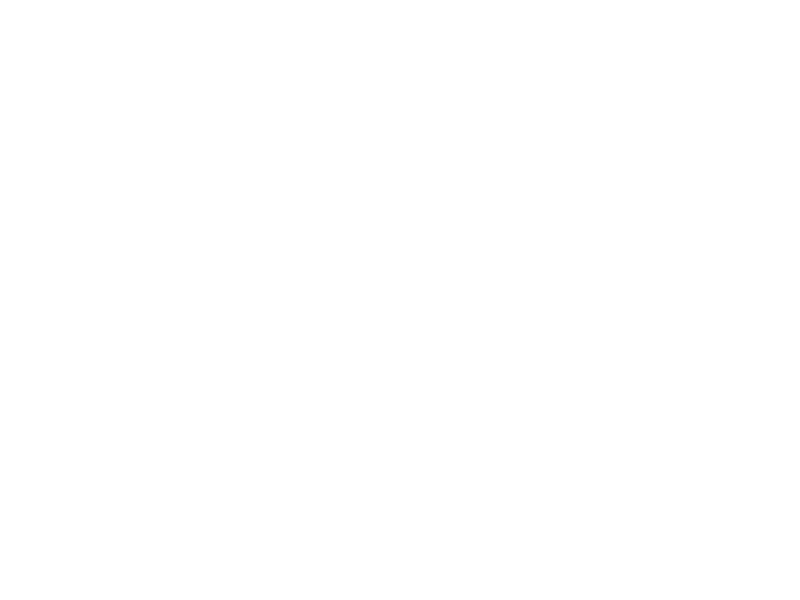

<IPython.core.display.Javascript object>


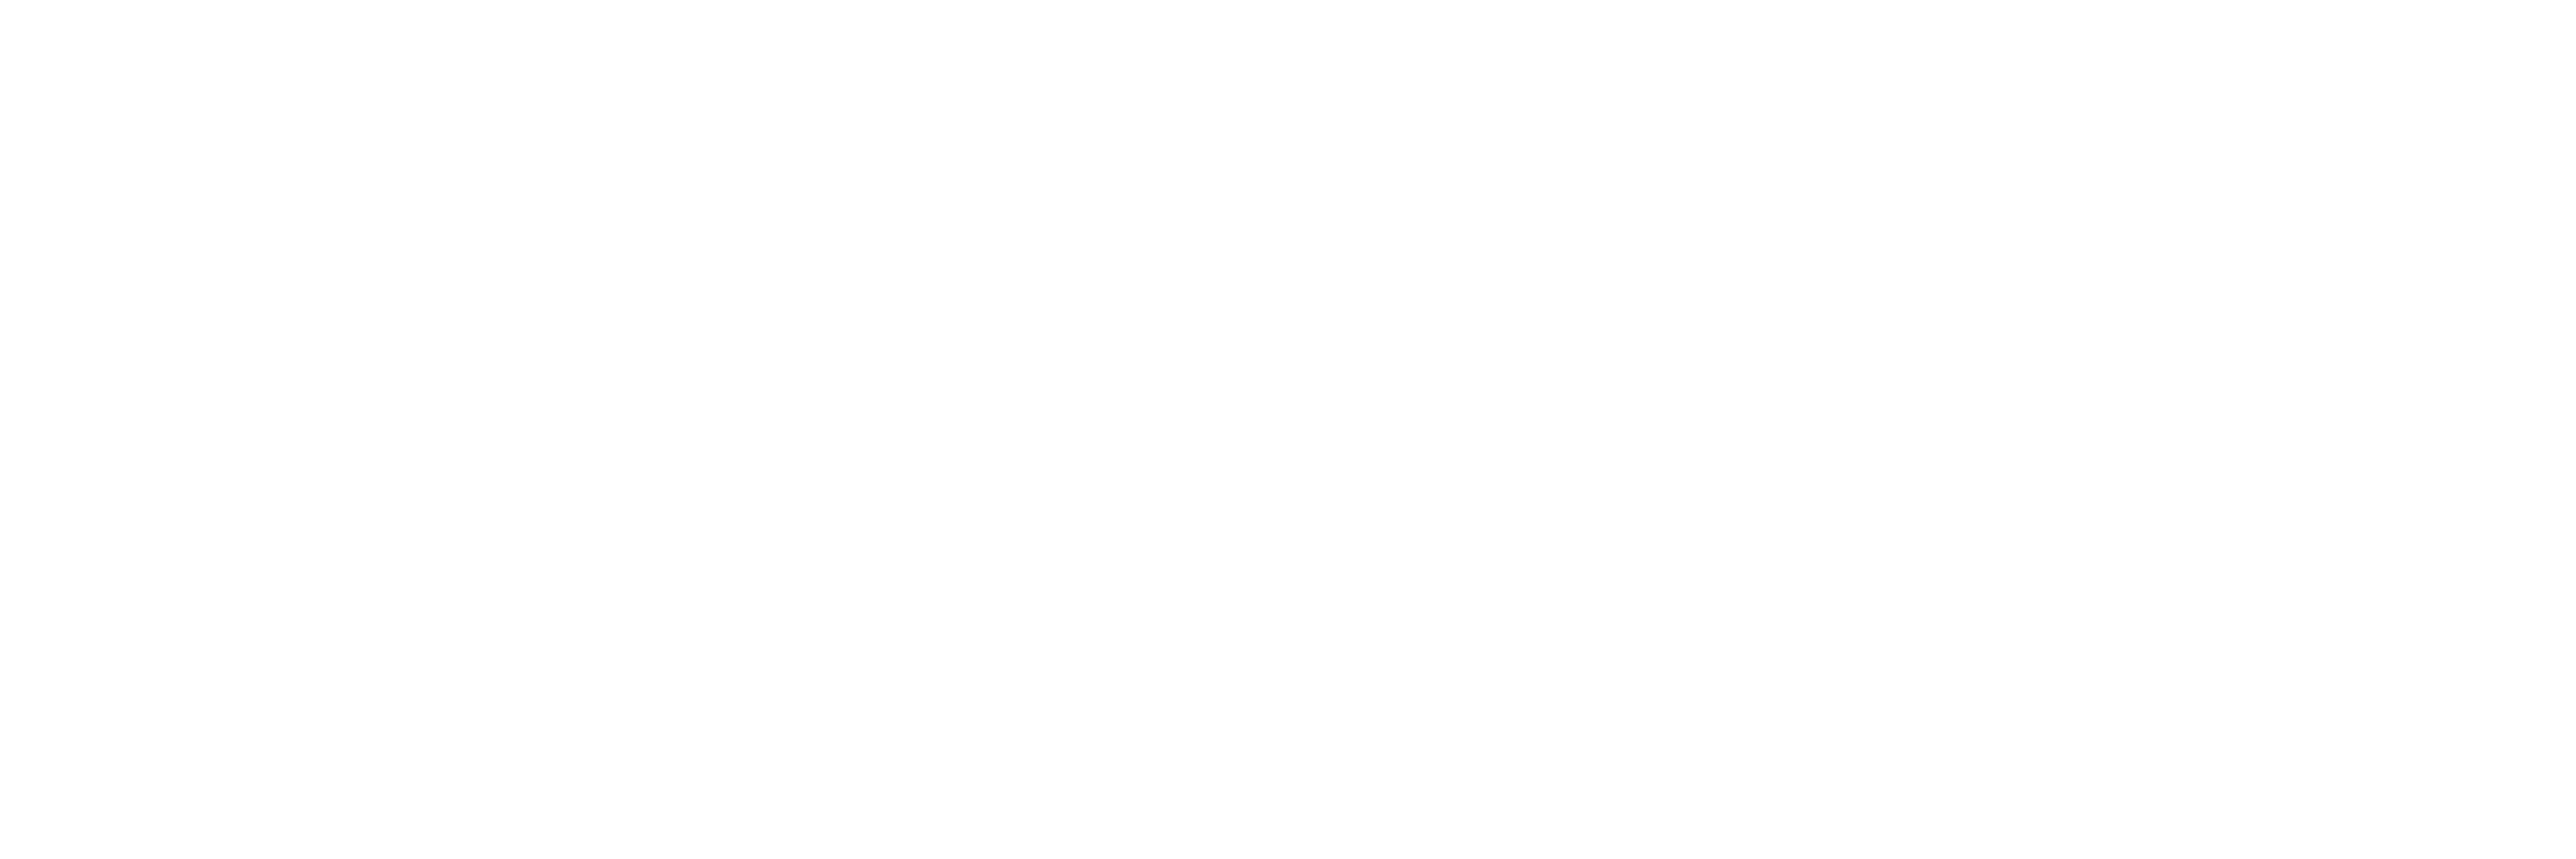

<IPython.core.display.Javascript object>


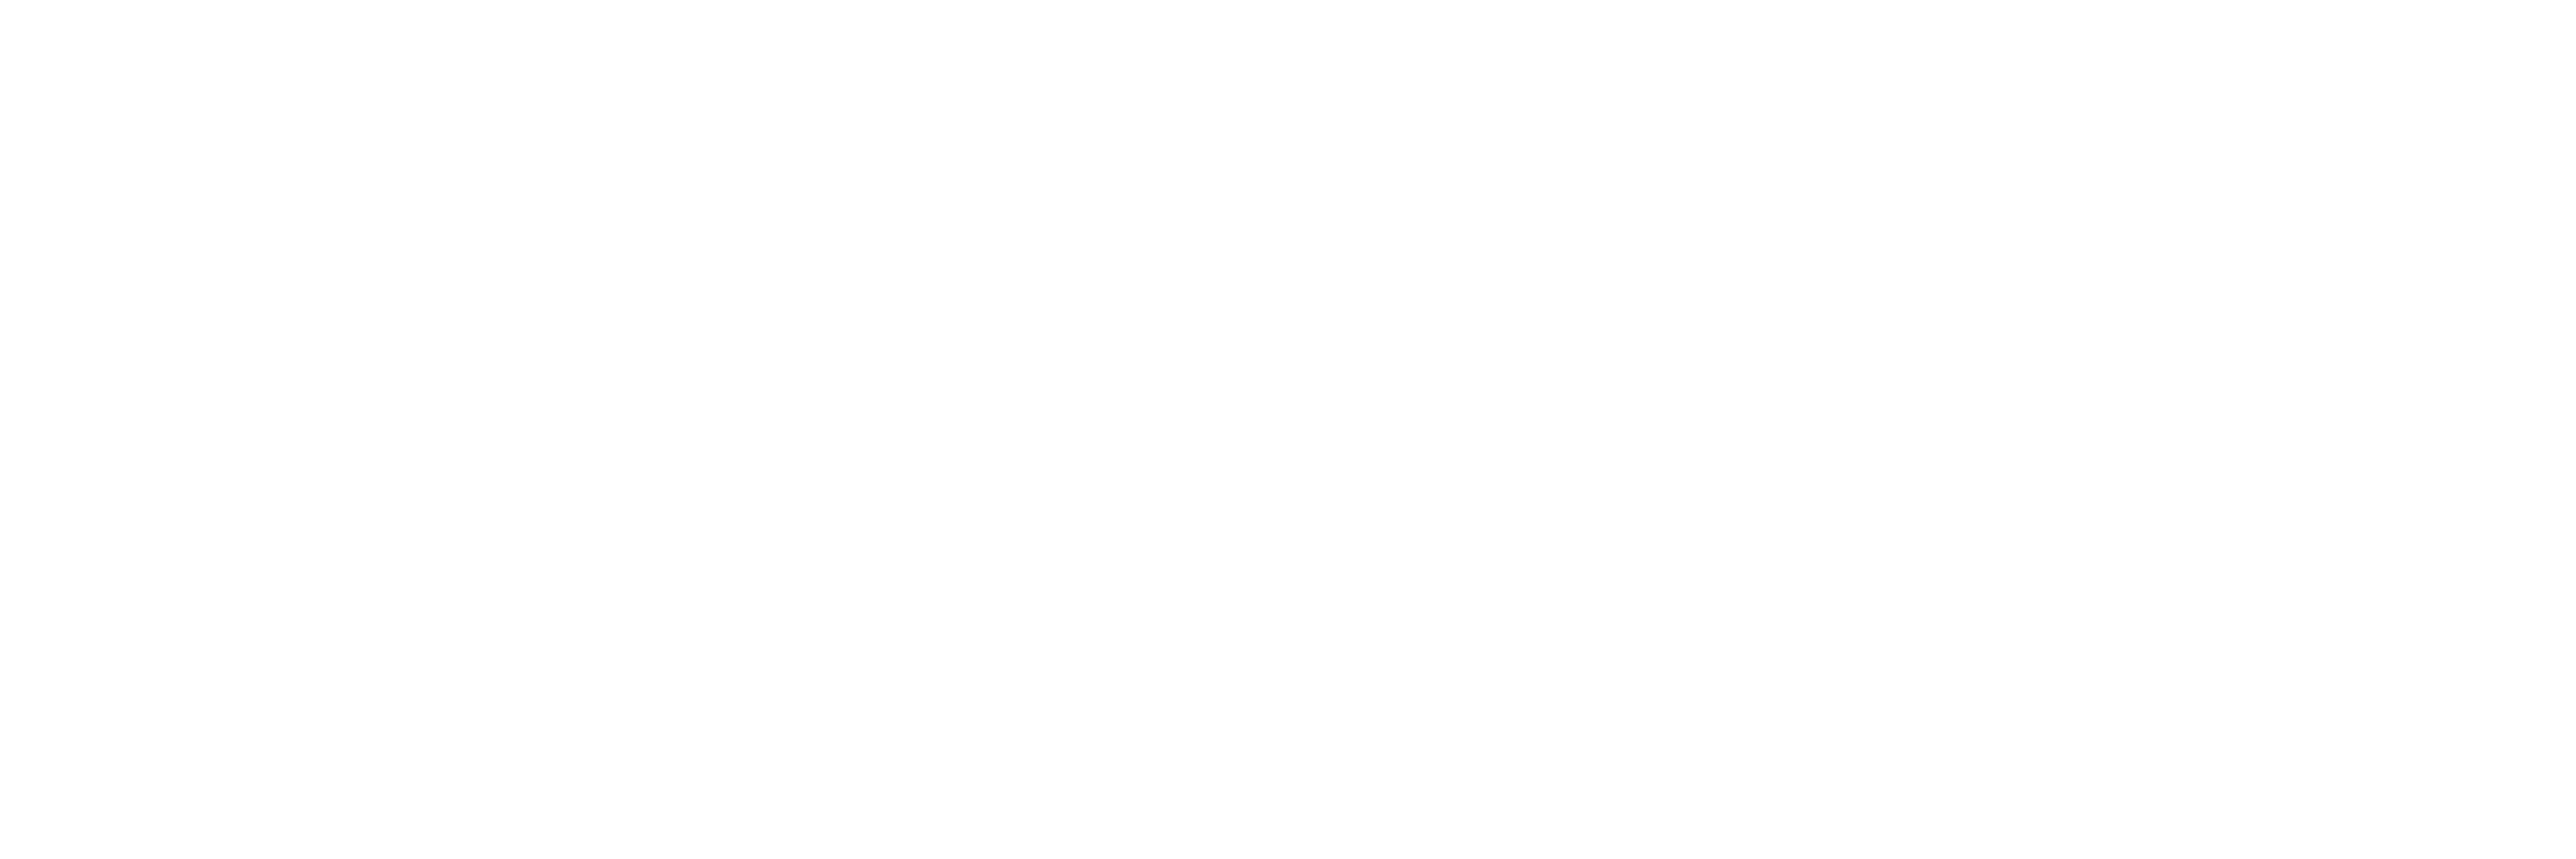

<IPython.core.display.Javascript object>


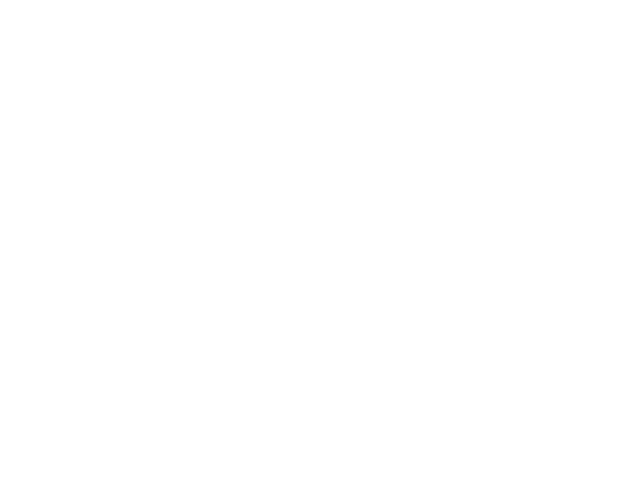

Plots created! Please check the directory "plot-poses" within the video directory


In [78]:
%matplotlib notebook 
#for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)

In [58]:
?deeplabcut.plot_trajectories

In [12]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_hdf(r"C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom3.0_TrimDeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000.h5")
df.head()

scorer    DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000  \
bodyparts                                                     LeftHand   
coords                                                               x   
0                                                   1.992289             
1                                                   3.110503             
2                                                 467.758593             
3                                                   2.790710             
4                                                1145.647144             

scorer                                                                 \
bodyparts                           RightHand                           
coords               y likelihood           x            y likelihood   
0          3581.238161   0.001312    5.953059  3311.249041   0.013639   
1          3311.471037   0.003080    5.682340  3311.279322   0.034183   
2          1911.696142   0.016185    4.728081  3311.405227   0.036477   
3          3581.767740   0.003185  954.221020  1281.820017   0.010635   
4          1418.749748   0.002507    4.163841  2394.267572   0.004523   

scorer                                                                    \
bodyparts         Nose                               Pellet                
coords               x            y likelihood            x            y   
0          1000.940547  1252.083008   0.165203  1185.107769  2388.262819   
1          1009.382782  1241.171028   0.003302  1180.656674  2387.208450   
2             3.993742  3579.486873   0.002555  1178.208495  2386.815376   
3             3.863183  3580.066667   0.002011   516.310061  3326.134146   
4           929.310264   901.786507   0.004856   516.500602  3326.895935   

scorer                
bodyparts             
coords    likelihood  
0           0.653934  
1           0.744621  
2           0.687161  
3           0.706205  
4           0.067804

In [15]:
df.describe()


scorer    DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000  \
bodyparts                                                     LeftHand   
coords                                                               x   
count                                             612.000000             
mean                                             1294.587569             
std                                               566.489027             
min                                                -0.173059             
25%                                               955.338525             
50%                                              1458.549845             
75%                                              1644.293059             
max                                              2161.044888             

scorer                                                                    \
bodyparts                             RightHand                            
coords               y  likelihood            x            y  likelihood   
count       612.000000  612.000000   612.000000   612.000000  612.000000   
mean       2455.822662    0.042246   609.627308  2811.817150    0.078364   
std         890.589556    0.138305   523.969844   763.555947    0.202453   
min           1.988913    0.000032     0.665848    76.401595    0.000153   
25%        1989.080632    0.000861     3.883312  2168.396138    0.001087   
50%        2089.116435    0.002397   764.576838  2395.076544    0.003136   
75%        3421.296761    0.011128   970.543810  3556.132724    0.019450   
max        3840.645847    0.977641  2139.572770  3840.410774    0.992057   

scorer                                                                     \
bodyparts         Nose                                Pellet                
coords               x            y  likelihood            x            y   
count       612.000000   612.000000  612.000000   612.000000   612.000000   
mean       1000.140640  2138.825481    0.222379  1161.420468  3607.459208   
std         249.147238   615.631056    0.313997   635.214989   435.197877   
min           0.269251   865.347540    0.000097     2.184450  1940.036492   
25%         990.724893  1820.097459    0.004228   736.731850  3637.395378   
50%        1030.763698  1986.446780    0.050586   963.540944  3822.212681   
75%        1069.846140  2166.098999    0.300523  1822.975545  3837.997508   
max        2152.967607  3841.093842    0.998524  2158.995823  3841.865475   

scorer                 
bodyparts              
coords     likelihood  
count      612.000000  
mean         0.364173  
std          0.308807  
min          0.000428  
25%          0.070970  
50%          0.276980  
75%          0.658898  
max          0.989263

In [71]:
df = pd.read_hdf(r"C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front4k60fpszoom3.0_Trim2DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000.h5")
df.describe()

scorer    DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000  \
bodyparts                                                     LeftHand   
coords                                                               x   
count                                             396.000000             
mean                                             1081.024990             
std                                               801.865156             
min                                                -1.075624             
25%                                               306.234073             
50%                                              1099.686393             
75%                                              1978.196430             
max                                              2162.322889             

scorer                                                                    \
bodyparts                             RightHand                            
coords               y  likelihood            x            y  likelihood   
count       396.000000  396.000000   396.000000   396.000000  396.000000   
mean       1915.892243    0.028620   507.260805  2028.133410    0.074291   
std         925.669503    0.089883   570.154718   789.584933    0.167471   
min           4.104054    0.000054     1.491787     0.110741    0.000132   
25%        1363.246884    0.001314     6.579469  1460.181150    0.001657   
50%        1541.223487    0.004285   137.076892  1945.901693    0.008166   
75%        2062.913943    0.013648   941.707332  2366.580038    0.052594   
max        3840.759733    0.904895  2135.639879  3840.026480    0.958066   

scorer                                                                     \
bodyparts         Nose                                Pellet                
coords               x            y  likelihood            x            y   
count       396.000000   396.000000  396.000000   396.000000   396.000000   
mean        832.015528  2042.639285    0.122190  1359.938273  3524.089973   
std         477.821564   905.199187    0.237828   693.038635   567.594545   
min          -1.233883     1.529313    0.000029     1.956876  1154.500621   
25%         795.323176  1530.546586    0.000845   649.109436  3461.410198   
50%         980.203261  1763.745589    0.006032  1651.501211  3830.206299   
75%        1059.898767  2137.143606    0.097552  1995.377958  3838.244082   
max        2155.672404  3839.283205    0.997360  2159.782144  3843.716391   

scorer                 
bodyparts              
coords     likelihood  
count      396.000000  
mean         0.122058  
std          0.173181  
min          0.000364  
25%          0.009609  
50%          0.044030  
75%          0.171100  
max          0.900990

In [76]:
df = pd.read_hdf(r"C:\Users\vjj14\Desktop\DeepLabCut\front4k60fpszoom3.0_Trim-nv-2019-06-03\videos\front1080p240fpszoom1.0DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000.h5")
df.describe()

scorer    DeepCut_resnet50_front4k60fpszoom3.0_TrimJun3shuffle1_286000  \
bodyparts                                                     LeftHand   
coords                                                               x   
count                                           15512.000000             
mean                                              476.662807             
std                                               199.051516             
min                                                -3.072265             
25%                                               556.934558             
50%                                               571.585048             
75%                                               572.115142             
max                                               576.400276             

scorer                                                             \
bodyparts                                 RightHand                 
coords                y    likelihood             x             y   
count      15512.000000  15512.000000  15512.000000  15512.000000   
mean          56.168319      0.000372     94.257165    269.637234   
std          113.435357      0.000808    199.582534    103.977182   
min           -0.002832      0.000023     -1.198687     -0.875000   
25%            1.973024      0.000192      4.560107    284.634581   
50%            2.359020      0.000286      5.130947    317.105902   
75%            4.928002      0.000423      5.801471    317.801870   
max          322.130518      0.046496    573.605843    321.000363   

scorer                                                             \
bodyparts                        Nose                               
coords       likelihood             x             y    likelihood   
count      15512.000000  15512.000000  15512.000000  15512.000000   
mean           0.001873    503.875873     39.304025      0.000522   
std            0.002485    172.544028     96.968325      0.004167   
min            0.000019     -1.059059     -0.550313      0.000017   
25%            0.000632    571.378365      0.997769      0.000229   
50%            0.001176    571.993842      1.213735      0.000329   
75%            0.002189    572.493355      1.552477      0.000470   
max            0.067399    575.610920    321.239240      0.320831   

scorer                                               
bodyparts        Pellet                              
coords                x             y    likelihood  
count      15512.000000  15512.000000  15512.000000  
mean         459.721134     70.262810      0.001173  
std          220.905013    127.125900      0.006426  
min           -0.952420     -1.799350      0.000008  
25%          564.175327      1.154488      0.000486  
50%          571.777898      1.417860      0.000696  
75%          572.075551      1.793241      0.000972  
max          574.988145    321.820386      0.218525